# Credit Card Customer Churn - Exploratory Data Analysis (EDA)

This notebook presents an initial inspection and exploratory data analysis of the BankChurners dataset, focusing on customer churn prediction. The goal is to understand the data structure, feature distributions, and their relationships with the target variable, as well as to identify potential data quality issues. The insights obtained in this stage will guide subsequent decisions regarding preprocessing and model selection.


## 1. Initial Overview

### Dataset Dictionary

| Column Name                     | Description |
|--------------------------------|-------------|
| `CLIENTNUM`                    | Unique identifier for each customer. |
| `Attrition_Flag`               | Target variable indicating whether the customer has churned or remains active. |
| `Customer_Age`                 | Age of the customer. |
| `Gender`                       | Customer gender. |
| `Dependent_count`              | Number of dependents associated with the customer. |
| `Education_Level`              | Highest education level attained by the customer. |
| `Marital_Status`               | Marital status of the customer. |
| `Income_Category`              | Annual income bracket of the customer. |
| `Card_Category`                | Type of credit card held by the customer. |
| `Months_on_book`               | Number of months the customer has been with the bank. |
| `Total_Relationship_Count`     | Total number of products held by the customer. |
| `Months_Inactive_12_mon`       | Number of months the customer was inactive in the last 12 months. |
| `Contacts_Count_12_mon`        | Number of contacts with the bank in the last 12 months. |
| `Credit_Limit`                 | Credit limit assigned to the customer. |
| `Total_Revolving_Bal`          | Total revolving balance on the credit card. |
| `Avg_Open_To_Buy`              | Average available credit (credit limit minus revolving balance). |
| `Total_Amt_Chng_Q4_Q1`         | Change in transaction amount between Q4 and Q1. |
| `Total_Ct_Chng_Q4_Q1`          | Change in transaction count between Q4 and Q1. |
| `Total_Trans_Amt`              | Total transaction amount in the last 12 months. |
| `Total_Trans_Ct`               | Total number of transactions in the last 12 months. |
| `Avg_Utilization_Ratio`        | Average credit utilization ratio. |

### Data Loading

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

path = "../data/BankChurners.csv"
df = pd.read_csv(path)

df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

### Removing unwanted columns

The dataset includes two Naive Bayes prediction columns and a `CLIENTNUM` ID column. They will be removed before any analysis as they do not provide relevant information.

In [3]:
df = df.drop(columns=[df.columns[0], *df.columns[-2:]])
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Dataset Structure

Inspecting the dataset's dimensions, data types and basic data quality indicators such as missing and duplicated values.

In [4]:
print(
    f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n"
    f"The dataset contains {df.isna().sum().sum()} NaN values.\n"
    f"The dataset has {df.duplicated().sum()} duplicated rows."
)

The dataset has 10127 rows and 20 columns.
The dataset contains 0 NaN values.
The dataset has 0 duplicated rows.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

As shown above:  
- No missing values and no duplicates detected.
- Dataset contains 21 features, mixing numerical and categorical variables.
- Numerical features show reasonable ranges with no structural issues.
- Categorical features are clean, but requiring encoding and mapping.

## 2. Exploratory Data Analysis

The Exploratory Data Analysis phase aims to understand the dataset’s structure, quality and underlying patterns before applying any preprocessing or modeling techniques. At this stage, we analyze variable distributions, identify potential anomalies and explore relationships between features to define strategies for handling potential issues. For organizational purposes, the analysis is structured into categorical variables, numerical variables and a final section focused on strategic insights.

### Categorical Columns

The dataset appears to contain no explicit NaN values, as previously observed. However, since missing information can be implicitly encoded, this apparent absence is momentarily questioned.

As shown below, this intuition is confirmed after inspecting the unique values of each categorical feature: `Education_Level`, `Income_Category`, and `Marital_Status` contain missing information represented by the "Unknown" category. We therefore proceed to explore these variables to determine the most appropriate strategy for handling these values.

In [7]:
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']

for col in categorical_cols:
    print(f'Unique values for {col}: {df[col].unique()}\n')

Unique values for Attrition_Flag: ['Existing Customer' 'Attrited Customer']

Unique values for Gender: ['M' 'F']

Unique values for Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

Unique values for Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

Unique values for Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']

Unique values for Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']



#### Missing Values in Categorical Features

##### Figure 1. Churn Probability per Income, Education and Marital Status

The goal of this first visualization is to assess whether the "Unknown" category — for education level, income category and marital status — exhibits a higher churn probability compared to other clients. Based on the plot, the churn rate of the Unknown group appears to be statistically similar to both the overall average and the other categories. This suggests that, at first glance, missing information alone is not an isolated predictor of extreme churn risk. However, further analysis is required to better understand the characteristics of these clients.

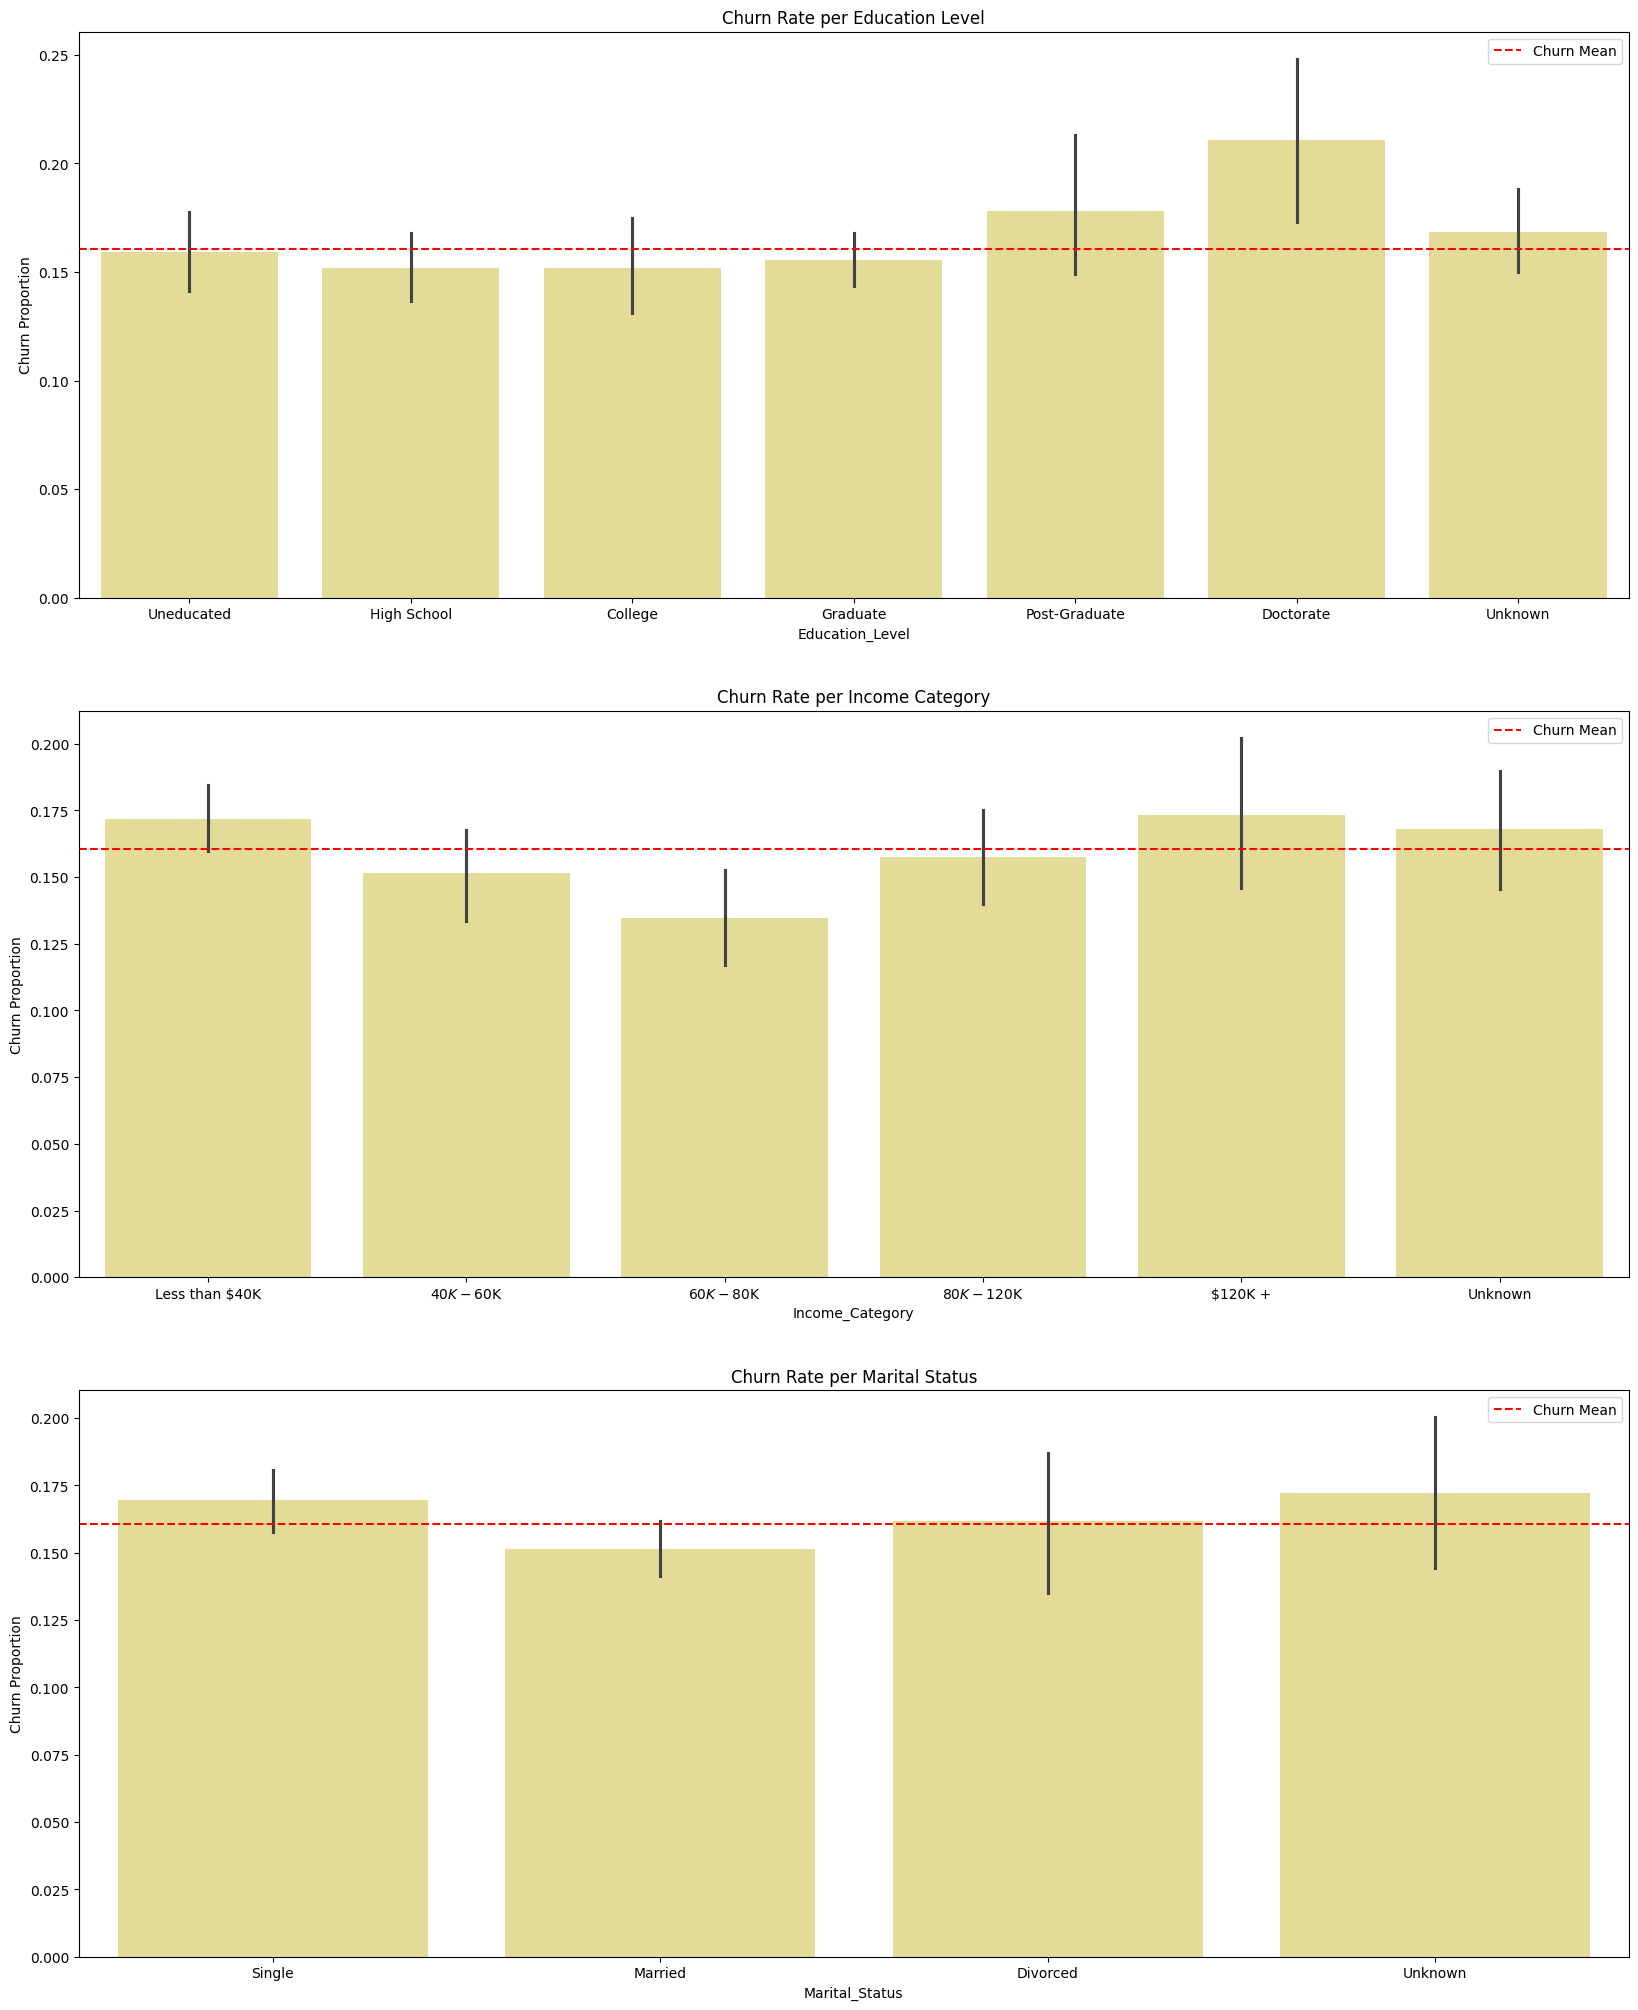

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_copy = df.copy() # Creating a copy to avoid modifying the original dataset.
df_copy['Attrition_Flag_Encoded'] = (df_copy['Attrition_Flag'] == 'Attrited Customer').astype(int) # Encoding the target (clients who churned)

order_education = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']
order_income = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
order_marital = ['Single', 'Married', 'Divorced', 'Unknown']
avg_churn = df_copy['Attrition_Flag_Encoded'].mean()

fig, ax = plt.subplots(3, 1, figsize=(20, 25))

# Education
sns.barplot(x='Education_Level', y='Attrition_Flag_Encoded', data=df_copy, color='khaki', order=order_education, ax=ax[0])
ax[0].set_title('Churn Rate per Education Level')
ax[0].set_ylabel('Churn Proportion')
ax[0].axhline(avg_churn, color='r', linestyle='--', label=f'Churn Mean')
ax[0].legend()

# Income
sns.barplot(x='Income_Category', y='Attrition_Flag_Encoded', data=df_copy, color='khaki', order=order_income, ax=ax[1])
ax[1].set_title('Churn Rate per Income Category')
ax[1].set_ylabel('Churn Proportion')
ax[1].axhline(avg_churn, color='r', linestyle='--', label=f'Churn Mean')
ax[1].legend()

# Marital Status
sns.barplot(x='Marital_Status', y='Attrition_Flag_Encoded', data=df_copy, color='khaki', order=order_marital, ax=ax[2])
ax[2].set_title('Churn Rate per Marital Status')
ax[2].set_ylabel('Churn Proportion')
ax[2].axhline(avg_churn, color='r', linestyle='--', label=f'Churn Mean')
ax[2].legend()

plt.show()

##### Figure 2. Exploring Correlations with Missing Income Data

The goal of this second visualization is to investigate the "Unknown" values within the `Income_Category` and assess whether they can be explained by other variables. By examining the plots, the following patterns are observed:

- **Gender Bias**: In the first plot, it becomes immediately clear that the vast majority of missing values belong to female clients. This reveals a strong correlation between gender and the absence of income information, consistent with a **MAR** (Missing At Random) mechanism.

- **Neutral Variables**: When analyzing distributions by Marital Status, Age and Months on Book, the missing values appear balanced and exhibit behavior very similar to the rest of the dataset. This suggests these variables do not explain the omission.

- **Education and Credit Limit**: Regarding education level, the distribution is mostly balanced, though there is a noticeable increase among clients with a Doctorate. However, the most interesting insight comes from the Credit Limit: clients who did not report income show slightly higher medians and quartiles compared to those who did.

These findings suggest that clients with missing income information tend to have a solid credit profile, likely reflecting financial privacy rather than economic vulnerability.

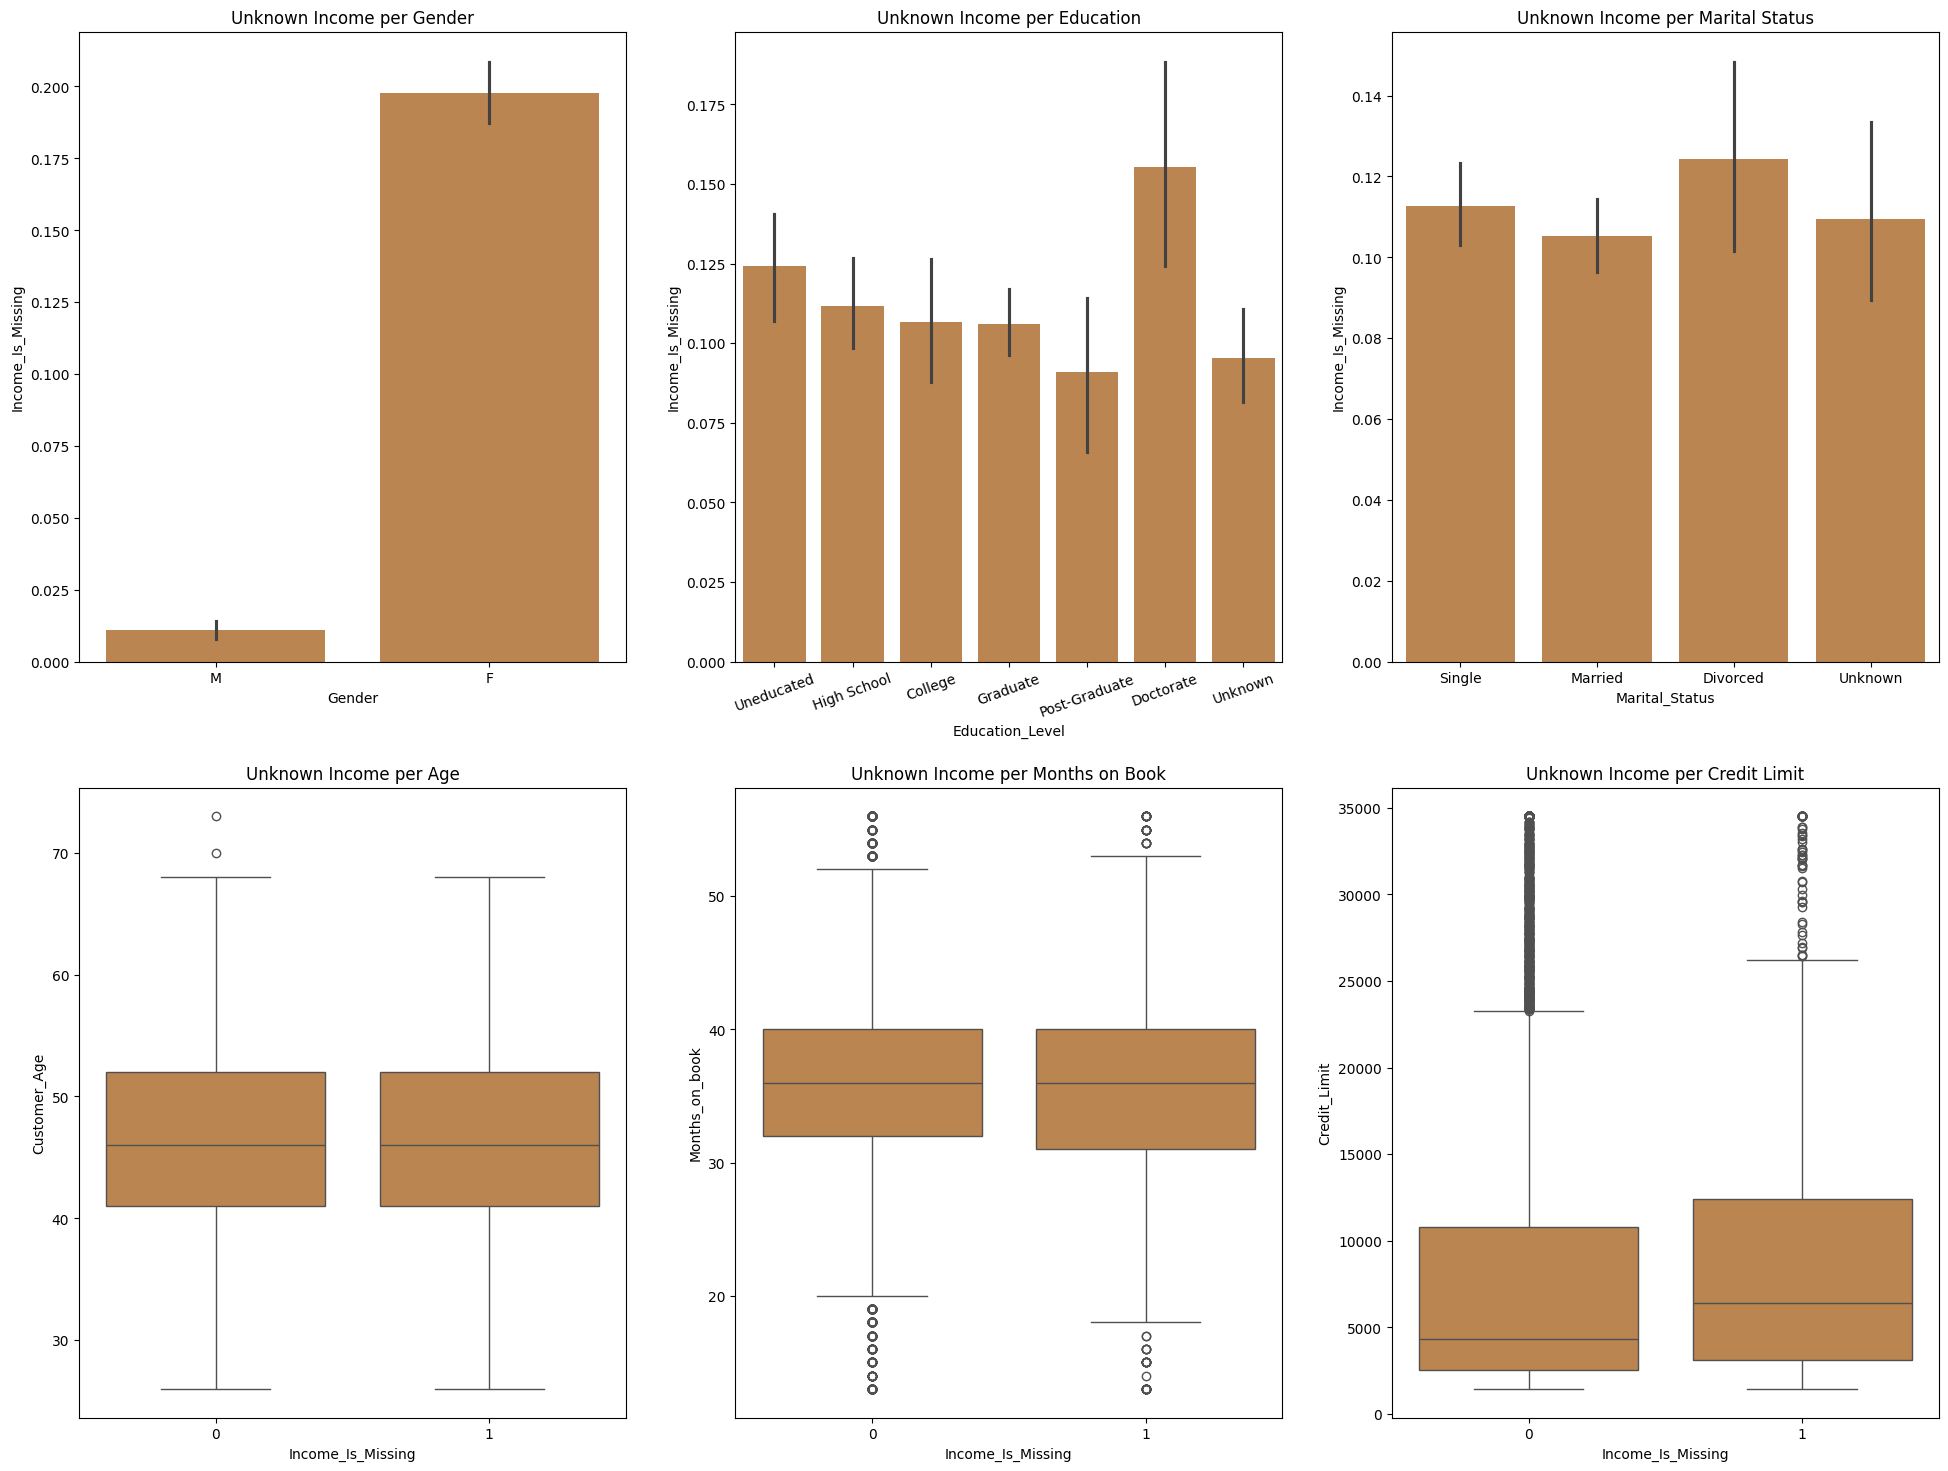

In [10]:
df_copy['Income_Is_Missing'] = (df_copy['Income_Category'] == "Unknown").astype(int)

fig, ax = plt.subplots(2, 3, figsize=(24, 18))

sns.barplot(x='Gender', y='Income_Is_Missing', data=df_copy, color='peru', ax=ax[0, 0])
ax[0, 0].set_title('Unknown Income per Gender')

sns.barplot(x='Education_Level', y='Income_Is_Missing', data=df_copy, color='peru', order=order_education, ax=ax[0, 1])
ax[0, 1].set_title('Unknown Income per Education')
ax[0, 1].tick_params(axis='x', rotation=20)

sns.barplot(x='Marital_Status', y='Income_Is_Missing', data=df_copy, color='peru', order=order_marital, ax=ax[0, 2])
ax[0, 2].set_title('Unknown Income per Marital Status')

sns.boxplot(x='Income_Is_Missing', y='Customer_Age', data=df_copy, color='peru', ax=ax[1, 0])
ax[1, 0].set_title('Unknown Income per Age')

sns.boxplot(x='Income_Is_Missing', y='Months_on_book', data=df_copy, color='peru', ax=ax[1, 1])
ax[1, 1].set_title('Unknown Income per Months on Book')

sns.boxplot(x='Income_Is_Missing', y='Credit_Limit', data=df_copy, color='peru', ax=ax[1, 2])
ax[1, 2].set_title('Unknown Income per Credit Limit')

plt.show()

##### Figure 3. Exploring Correlations with Missing Education Data

We applied the same visualization strategy used for Income to investigate whether the missing values in `Education_Level` follow any identifiable pattern. As shown below, both groups — clients who declared their education and those who omitted it — exhibit nearly identical distributions across all plots. Since no variable appears to systematically influence or explain these missing values, it is reasonable to conclude that they are consistent with a **MCAR** (Missing Completely At Random) mechanism. This suggests that the missing data is likely due to random factors rather than an underlying bias.

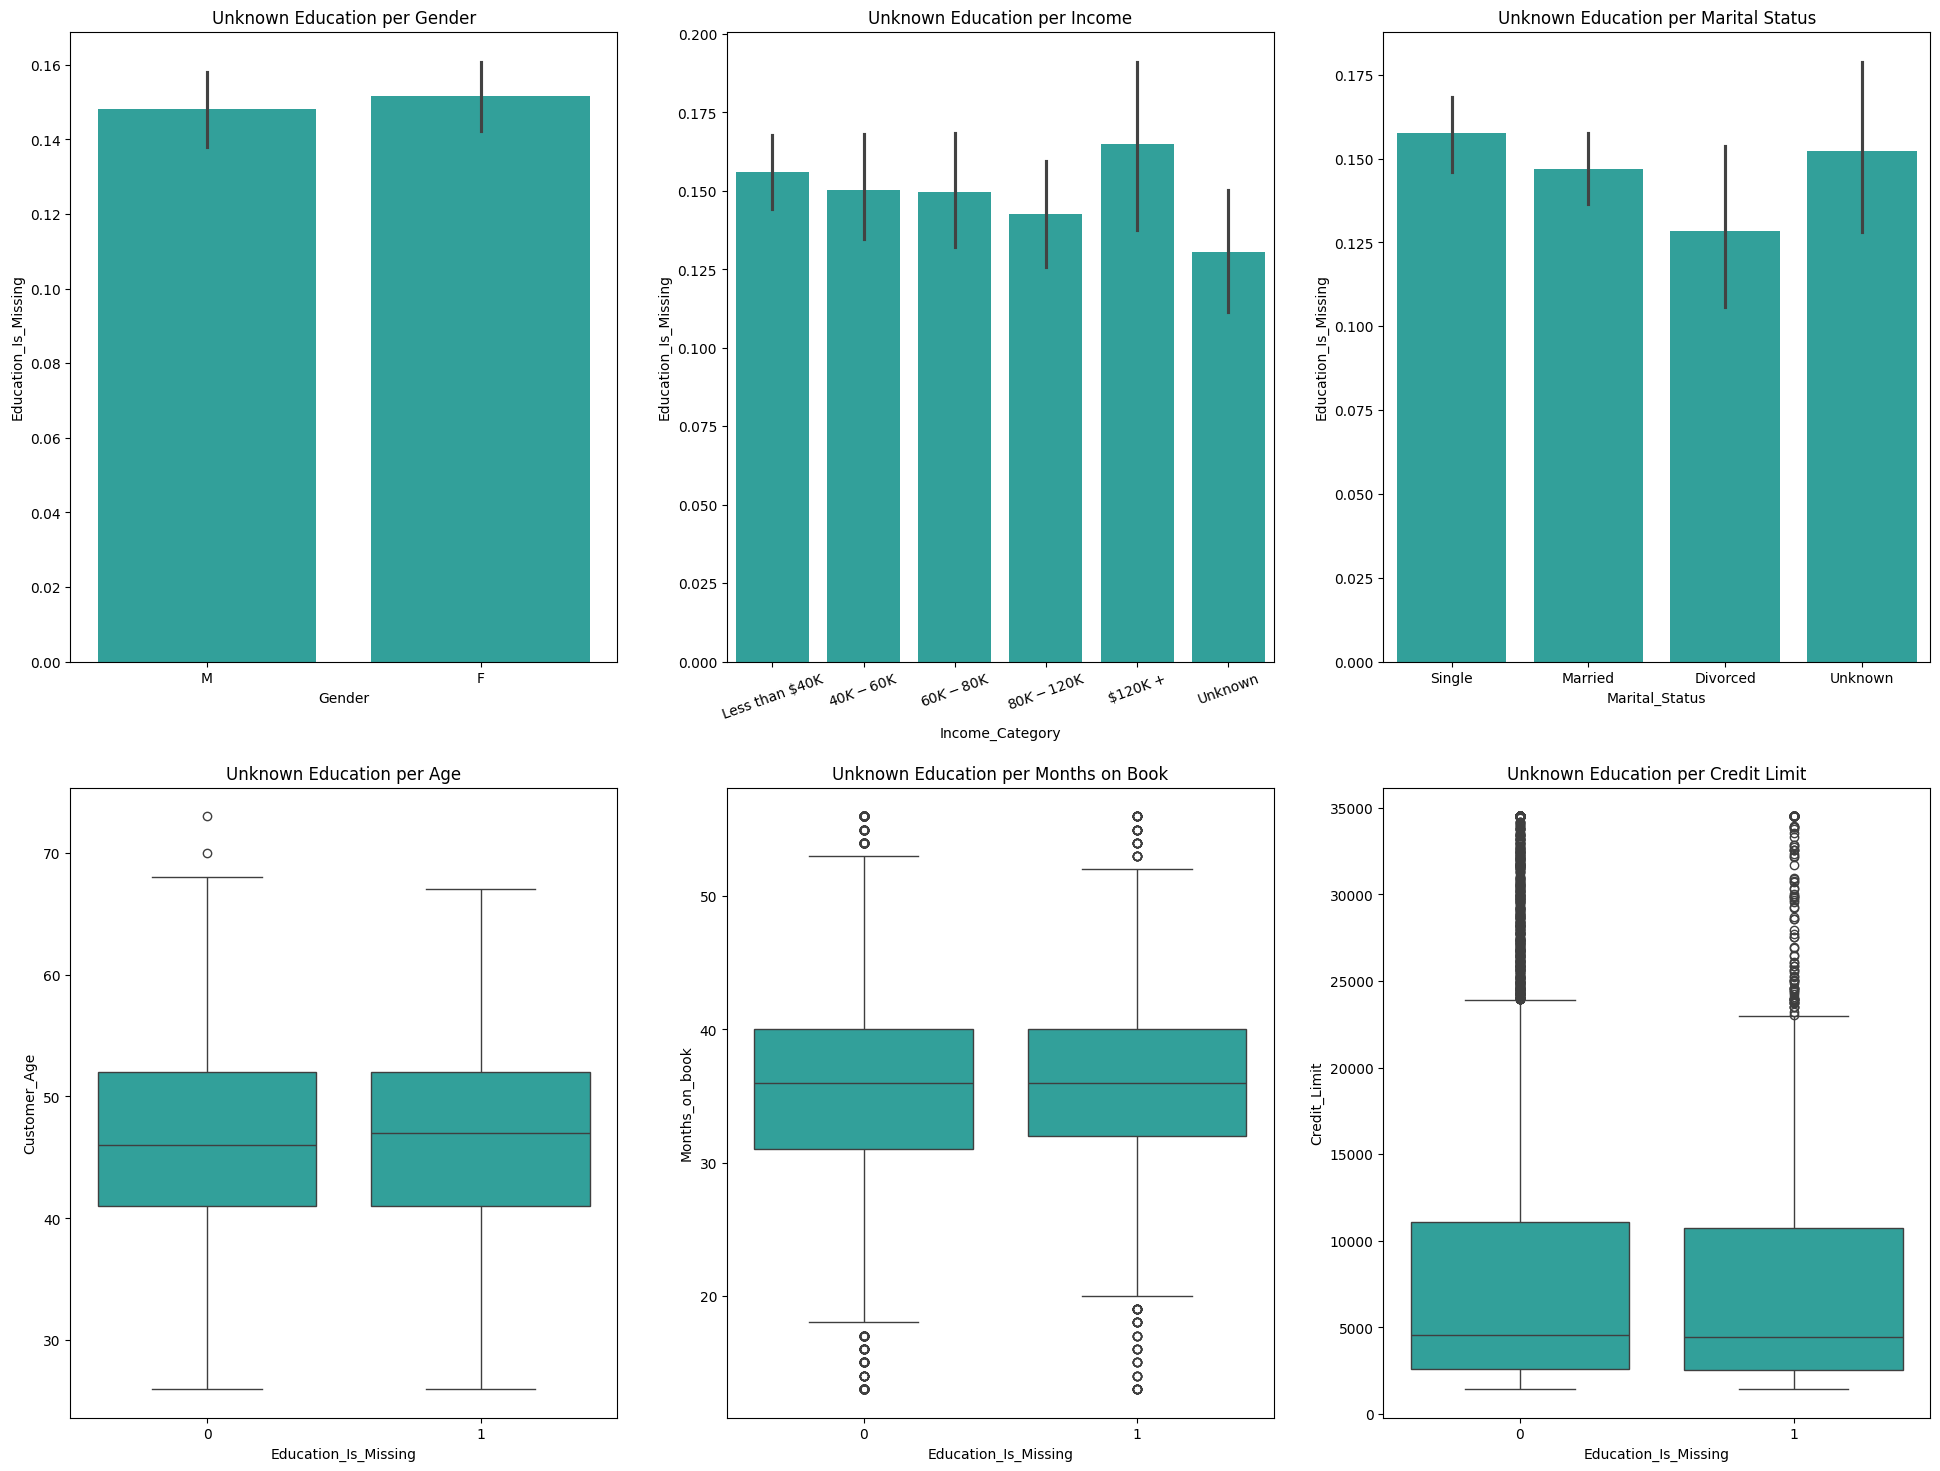

In [11]:
df_copy['Education_Is_Missing'] = (df['Education_Level'] == "Unknown").astype(int)

fig, ax = plt.subplots(2, 3, figsize=(24, 18))

sns.barplot(x='Gender', y='Education_Is_Missing', data=df_copy, color='lightseagreen', ax=ax[0, 0])
ax[0, 0].set_title('Unknown Education per Gender')

sns.barplot(x='Income_Category', y='Education_Is_Missing', data=df_copy, color='lightseagreen', order=order_income, ax=ax[0, 1])
ax[0, 1].set_title('Unknown Education per Income')
ax[0, 1].tick_params(axis='x', rotation=20)

sns.barplot(x='Marital_Status', y='Education_Is_Missing', data=df_copy, color='lightseagreen', order=order_marital, ax=ax[0, 2])
ax[0, 2].set_title('Unknown Education per Marital Status')

sns.boxplot(x='Education_Is_Missing', y='Customer_Age', data=df_copy, color='lightseagreen', ax=ax[1, 0])
ax[1, 0].set_title('Unknown Education per Age')

sns.boxplot(x='Education_Is_Missing', y='Months_on_book', data=df_copy, color='lightseagreen', ax=ax[1, 1])
ax[1, 1].set_title('Unknown Education per Months on Book')

sns.boxplot(x='Education_Is_Missing', y='Credit_Limit', data=df_copy, color='lightseagreen', ax=ax[1, 2])
ax[1, 2].set_title('Unknown Education per Credit Limit')

plt.show()

##### Figure 4. Exploring Correlations with Marital Data

Finally, the investigation into `Marital_Status` mirrors the findings for Education Level, revealing a lack of systematic bias. Unlike the Income variable, the distribution of missing values is balanced across gender and numerical variables such as Age, Months on Book and Credit Limit, which show nearly identical medians and no significant differences in quartiles between both groups. These observations support the conclusion that these missing values are also consistent with a **MCAR** (Missing Completely At Random) mechanism, likely resulting from random data entry omissions rather than an underlying demographic profile.

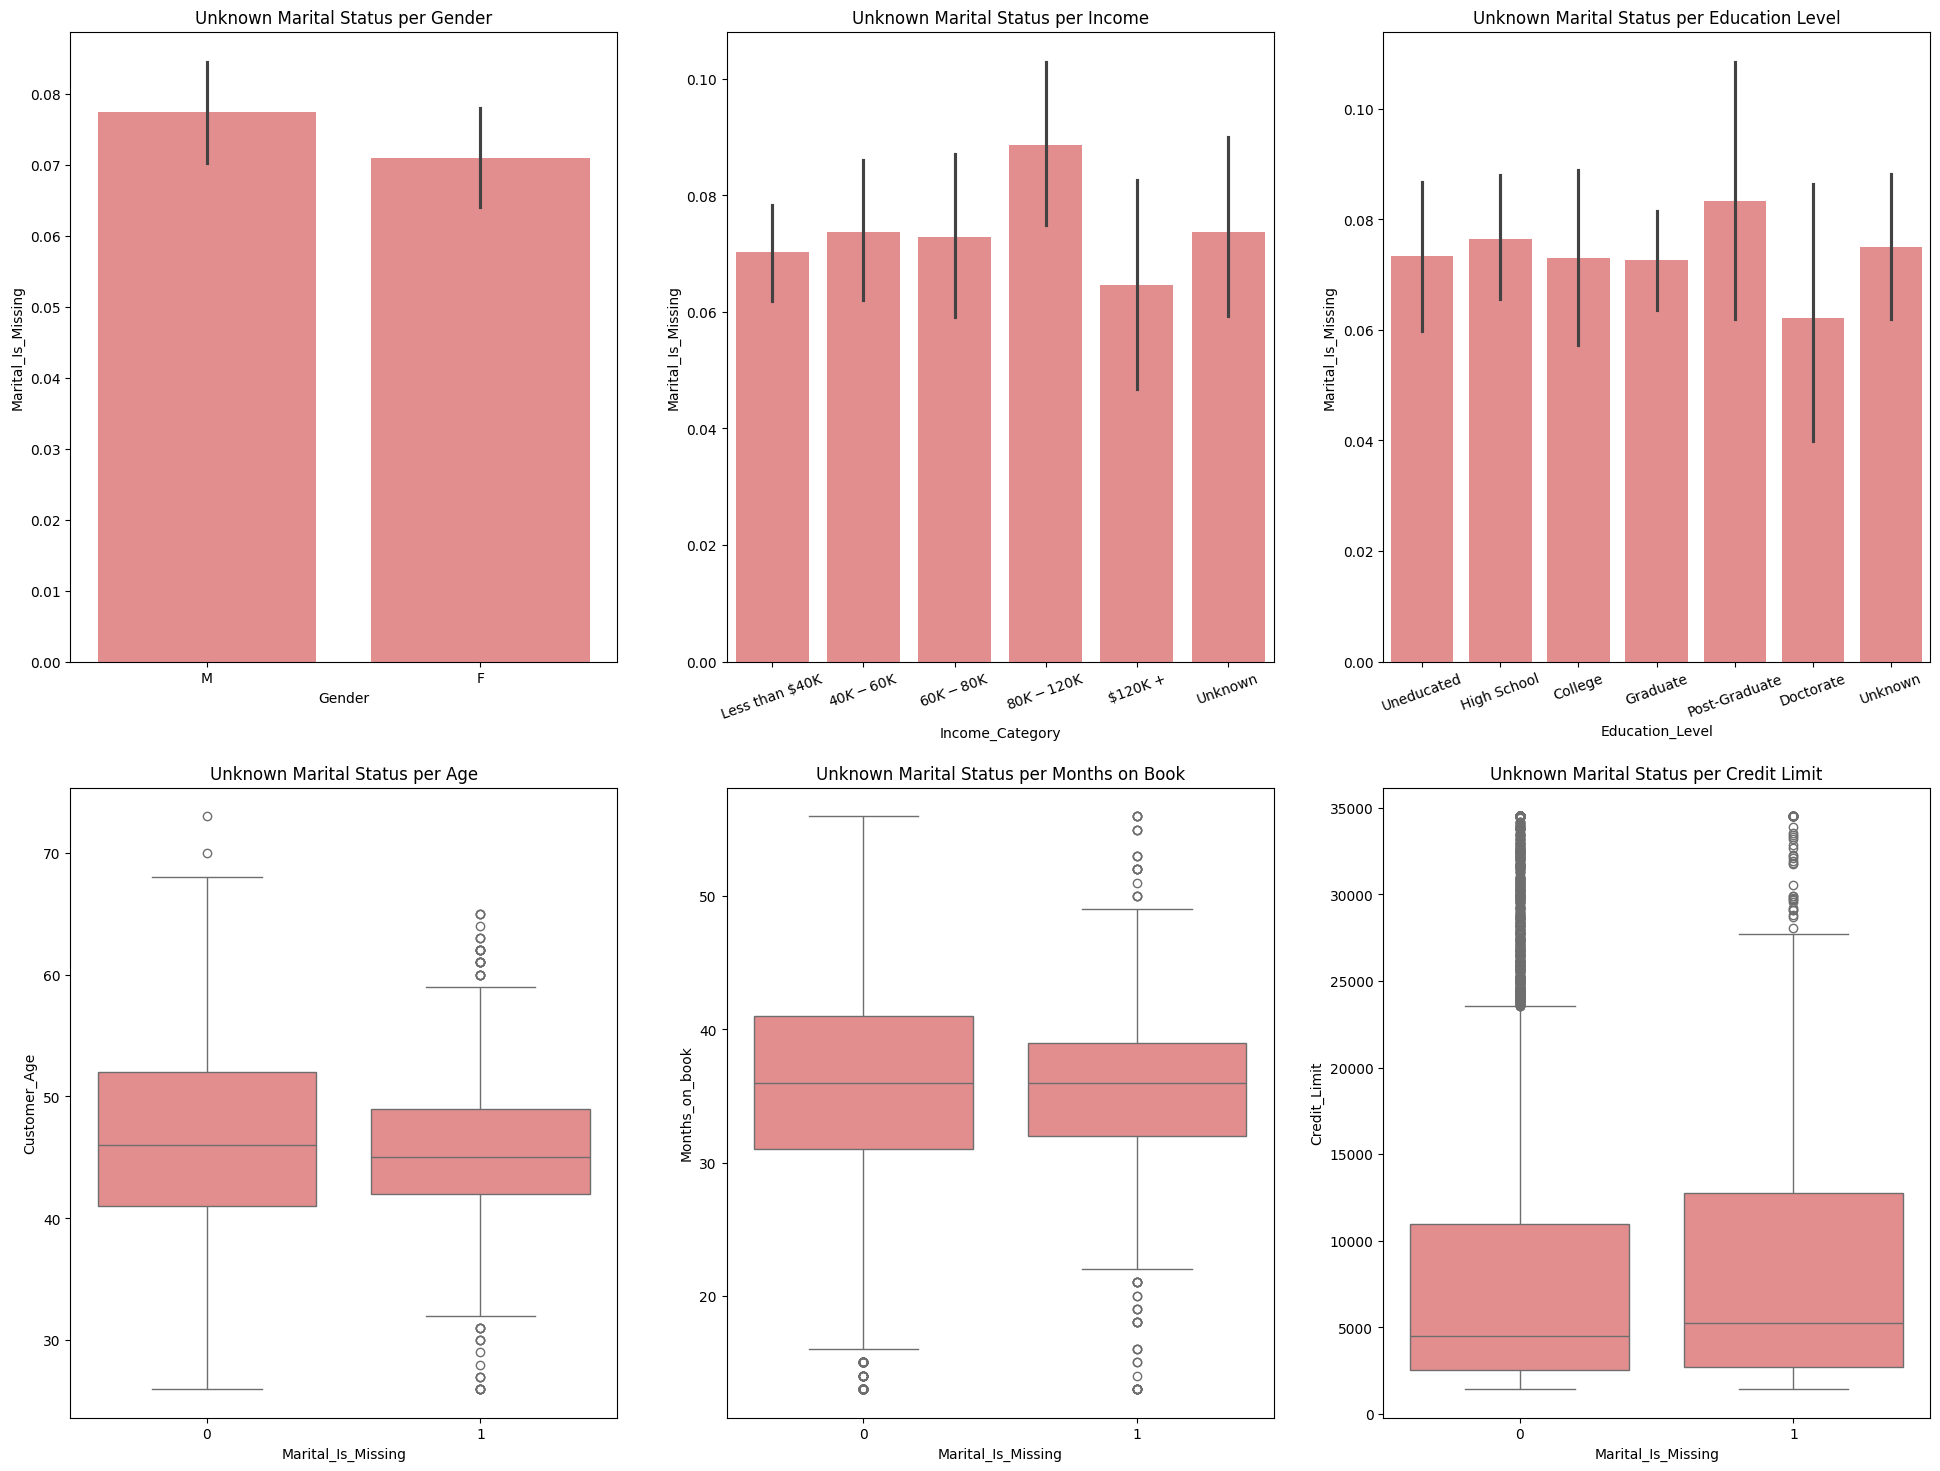

In [12]:
df_copy['Marital_Is_Missing'] = (df['Marital_Status'] == "Unknown").astype(int)

fig, ax = plt.subplots(2, 3, figsize=(24, 18))

sns.barplot(x='Gender', y='Marital_Is_Missing', data=df_copy, color='lightcoral', ax=ax[0, 0])
ax[0, 0].set_title('Unknown Marital Status per Gender')

sns.barplot(x='Income_Category', y='Marital_Is_Missing', data=df_copy, color='lightcoral', order=order_income, ax=ax[0, 1])
ax[0, 1].set_title('Unknown Marital Status per Income')
ax[0, 1].tick_params(axis='x', rotation=20)

sns.barplot(x='Education_Level', y='Marital_Is_Missing', data=df_copy, color='lightcoral', order=order_education, ax=ax[0, 2])
ax[0, 2].set_title('Unknown Marital Status per Education Level')
ax[0, 2].tick_params(axis='x', rotation=20)

sns.boxplot(x='Marital_Is_Missing', y='Customer_Age', data=df_copy, color='lightcoral', ax=ax[1, 0])
ax[1, 0].set_title('Unknown Marital Status per Age')

sns.boxplot(x='Marital_Is_Missing', y='Months_on_book', data=df_copy, color='lightcoral', ax=ax[1, 1])
ax[1, 1].set_title('Unknown Marital Status per Months on Book')

sns.boxplot(x='Marital_Is_Missing', y='Credit_Limit', data=df_copy, color='lightcoral', ax=ax[1, 2])
ax[1, 2].set_title('Unknown Marital Status per Credit Limit')

plt.show()

##### Strategy for Missing Data Treatment

Based on the insights derived from the analysis, standard imputation methods are likely to be detrimental, particularly for `Income_Category`, where missing values are strongly correlated with gender. To avoid introducing bias by replacing these gaps with population-level statistics that do not accurately represent this subgroup, the chosen strategy is to retain "Unknown" as a distinct and valid category during the preprocessing stage. This approach preserves underlying behavioral signals and allows the machine learning model to independently learn associations related to the absence of information across all three variables.

#### Categorical Features Distributions

In the previous section, while analyzing the Churn Rate, significant variation was observed in the confidence intervals across different groups, with some categories exhibiting wide error bars and suggesting limited sample sizes. Therefore, it is important to examine the distribution and balance of each categorical feature to validate this hypothesis. The objective of this subsection is to identify categories with very low frequency or strong imbalance that may lead to overfitting or model instability, thereby informing preprocessing decisions such as grouping similar categories or applying rare label encoding.

##### Distribution and Churn Risk by Category

Given these considerations, the visualizations below jointly display the category distribution (volume) and churn rate (risk) for each categorical feature. This combined perspective allows the identification of **rare categories**, potential class **imbalance issues** and unstable churn estimates driven by **low sample sizes**. Key observations and strategies include:

`Attrition_Flag` (Target Variable):

- The dataset is significantly imbalanced, making Accuracy a misleading metric, as a naive model could achieve high performance by always predicting non-churn. Therefore, evaluation will focus on Recall and F1-Score, and techniques such as class weighting and over-sampling (SMOTE) will be considered.

`Gender`:

- The distribution is balanced in volume, but females exhibit a higher churn probability. Given the clear and stable pattern, no transformation is required beyond standard encoding.

`Education_Level`:

- Doctorate and Post-Graduate show low cardinality and similar churn behavior, with higher variance due to limited sample size. To improve statistical robustness, these categories could be merged into a single `Advanced_Degree` group.

`Income_Category`:

- Churn follows a U-shaped trend, peaking at the income extremes (<$40K and $120K+) and bottoming out in the $60K–$80K range. Although the $120K+ category represents a small volume, it shows the highest average risk and will be retained to capture this behavior.

`Marital_Status`:

- Despite lower cardinality in Divorced and Unknown, churn rates are relatively homogeneous across categories. We will rely on standard encoding, with an optional test of a binary `Not_Married` feature (Single + Divorced).

`Card_Category`:

- The distribution is highly skewed, with Gold and Platinum representing very rare labels and unstable churn estimates. To reduce noise and avoid overfitting, Silver, Gold, and Platinum should be merged into a single `Non_Blue` category.

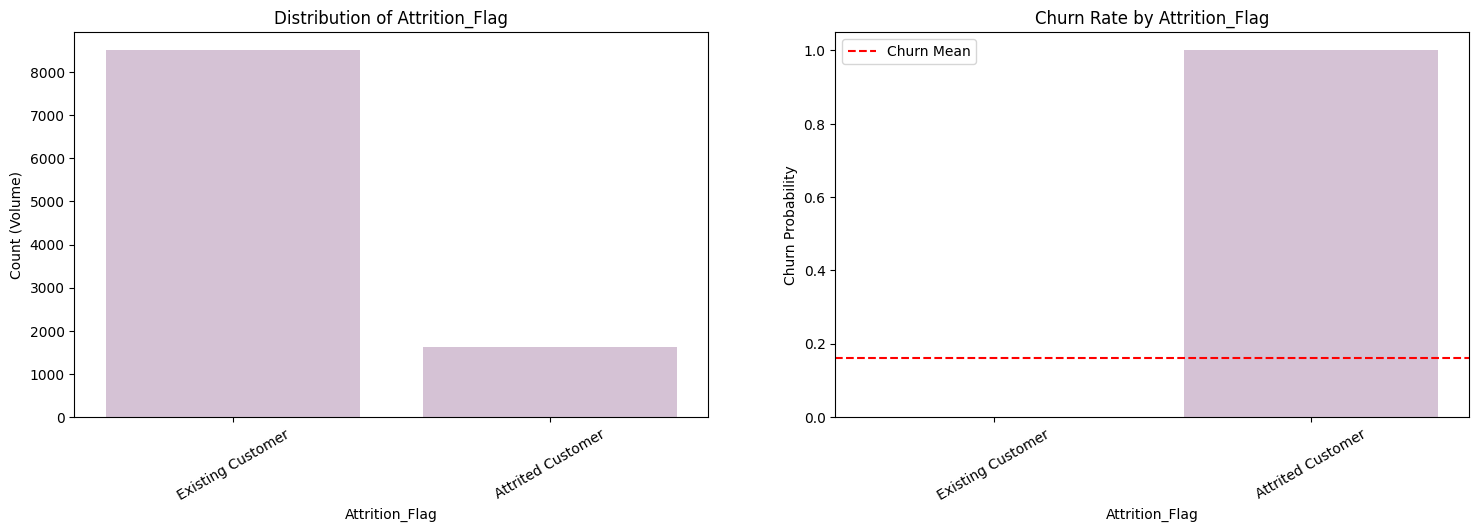

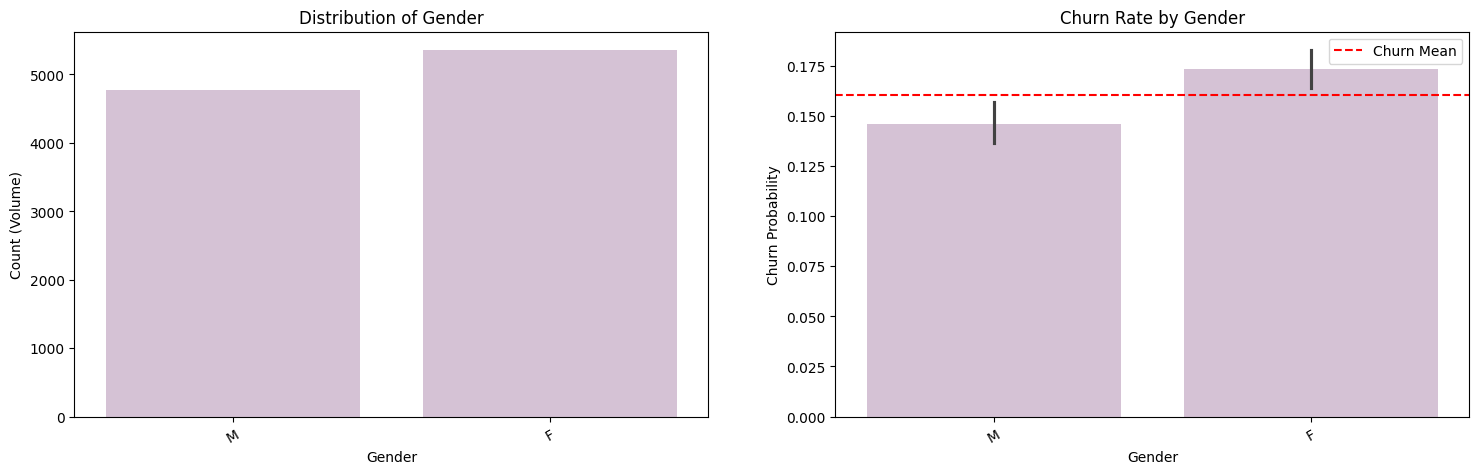

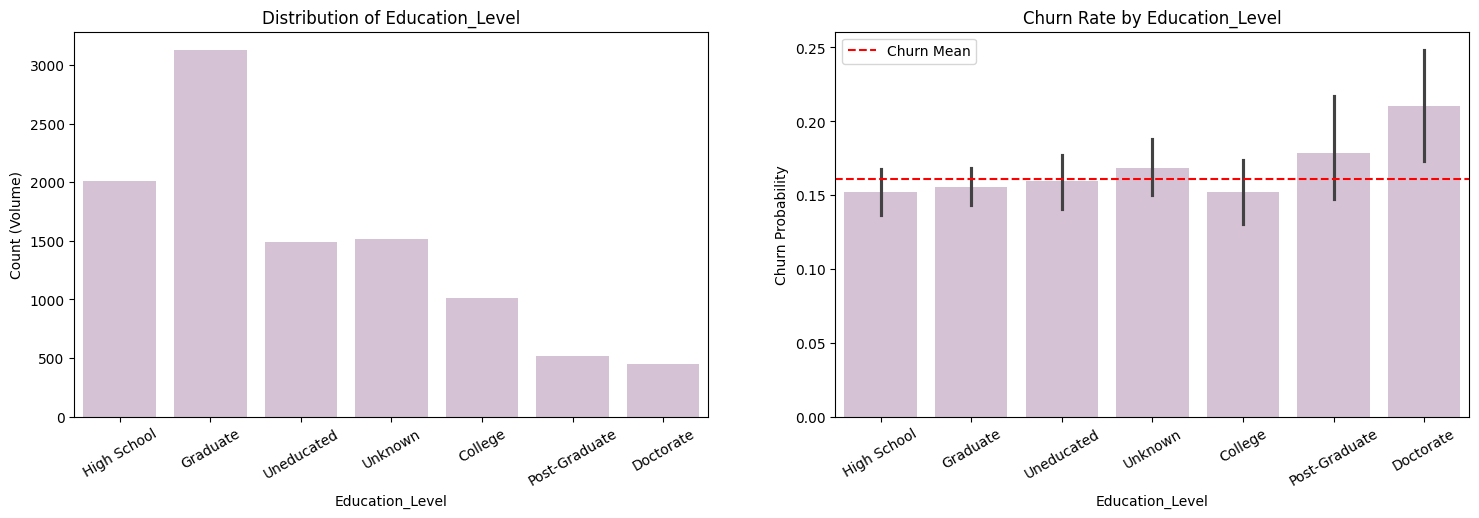

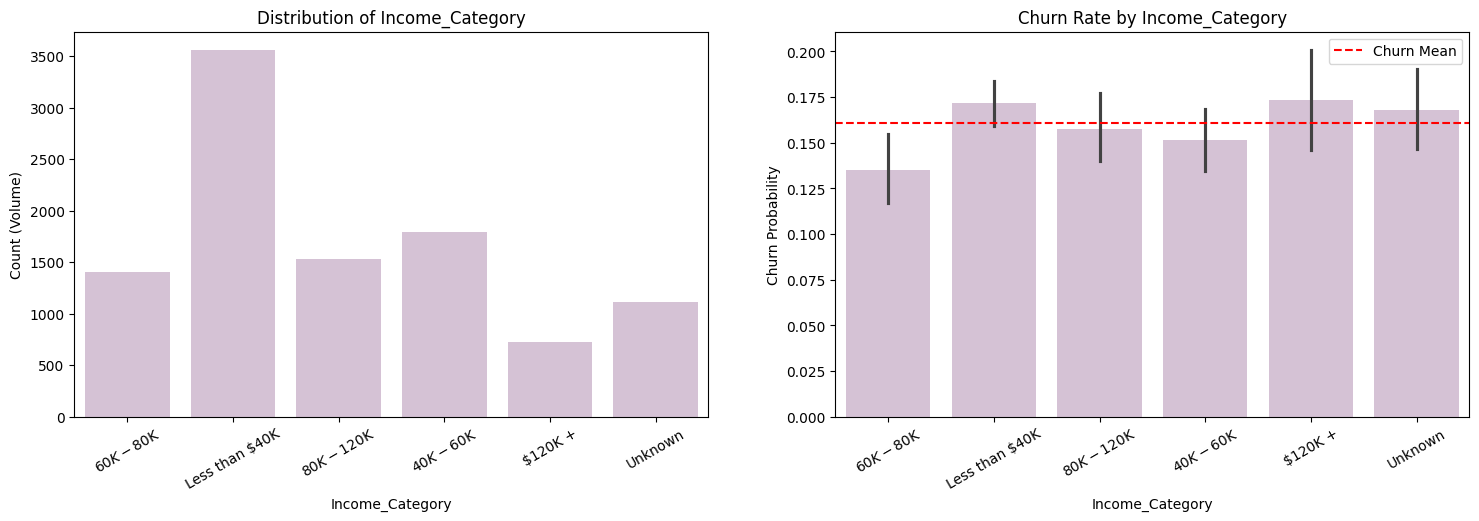

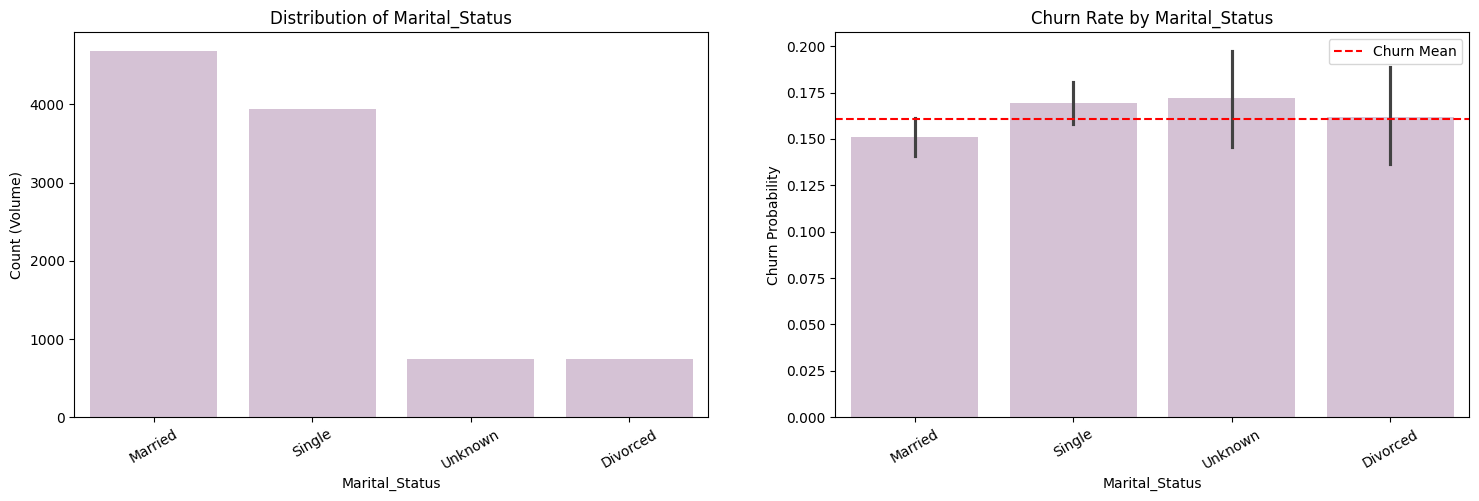

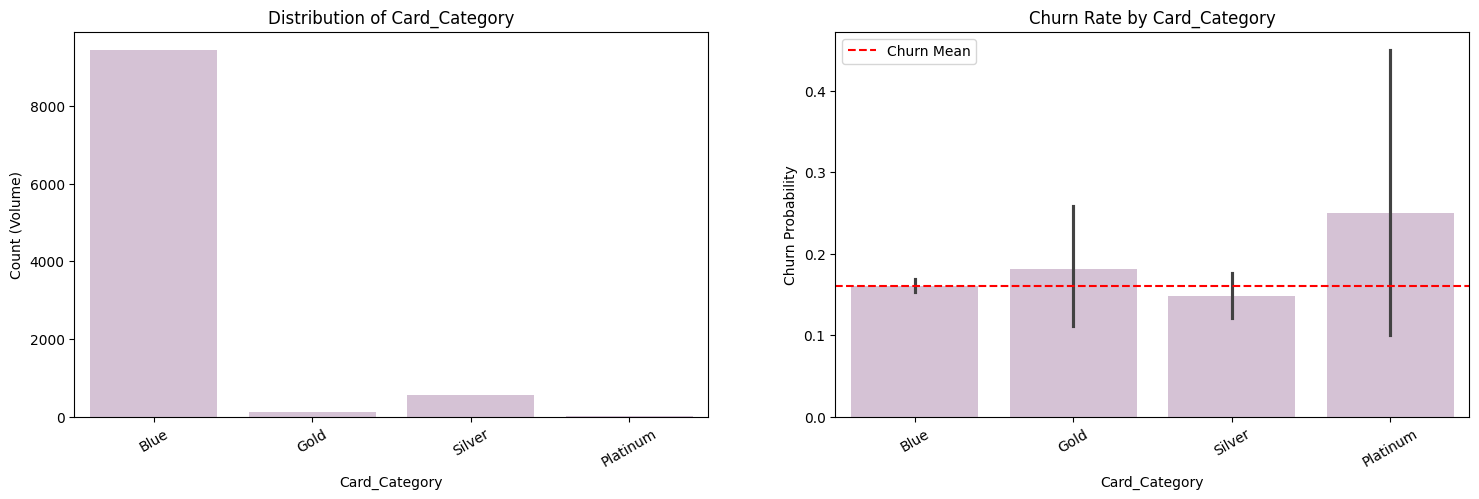

In [15]:
for col in categorical_cols:
    fig, ax = plt.subplots(1, 2, figsize=(18, 5))
    
    # Plot 1 - Distribution
    sns.countplot(data=df_copy, x=col, color='thistle', ax=ax[0])
    ax[0].set_title(f'Distribution of {col}')
    ax[0].set_ylabel('Count (Volume)')
    ax[0].tick_params(axis='x', rotation=30)

    # Plot 2 - Churn Rate
    sns.barplot(data=df_copy, x=col, y='Attrition_Flag_Encoded', color='thistle', ax=ax[1])
    ax[1].set_title(f'Churn Rate by {col}')
    ax[1].axhline(avg_churn, color='r', linestyle='--', label=f'Churn Mean')
    ax[1].legend()
    ax[1].set_ylabel('Churn Probability')
    ax[1].tick_params(axis='x', rotation=30)

    plt.show()

---
### Numerical Columns

To conduct a more structured exploratory analysis, numerical features were grouped based on their semantic meaning rather than strictly on data type. This distinction allows for more appropriate visualizations and interpretations, as discrete variables are primarily analyzed through frequency and threshold effects, while continuous variables require distributional and scale-based analysis.

#### Discrete Numerical Features

These variables represent count-based or integer-valued measures related to customer behavior and demographics. The analysis focuses on identifying threshold effects, distribution imbalances and their relationship with churn across discrete ranges.

##### Distribution and Churn Risk by Discrete Features

The next visualization follows the same volume-versus-risk framework used in the categorical analysis to maintain consistency across feature types. Discrete numerical features were evaluated through their distribution and associated churn rates and key observations include:

`Total_Relationship_Count`:

- A clear negative relationship with churn is observed: as the number of products held increases, the probability of attrition decreases significantly. Customers with one or two products represent the highest-risk group, while those holding three or more products show substantially higher retention.

`Contacts_Count_12_mon`:

- This feature exhibits a strong positive association with churn. A higher number of customer service contacts likely reflects dissatisfaction or unresolved issues. Churn risk increases sharply after three contacts. The 100% churn observed at six contacts is likely driven by extremely low sample size and should be interpreted with caution.

`Months_Inactive_12_mon`:

- Churn risk increases progressively between one and four months of inactivity, with a noticeable inflection point after the second month. The elevated churn rate observed at zero months of inactivity is likely statistical noise caused by a very small number of observations.

`Dependent_count`:

- The churn rate remains relatively stable and close to the global average across all values, indicating that family size appears to be a weak predictor of attrition in this dataset.

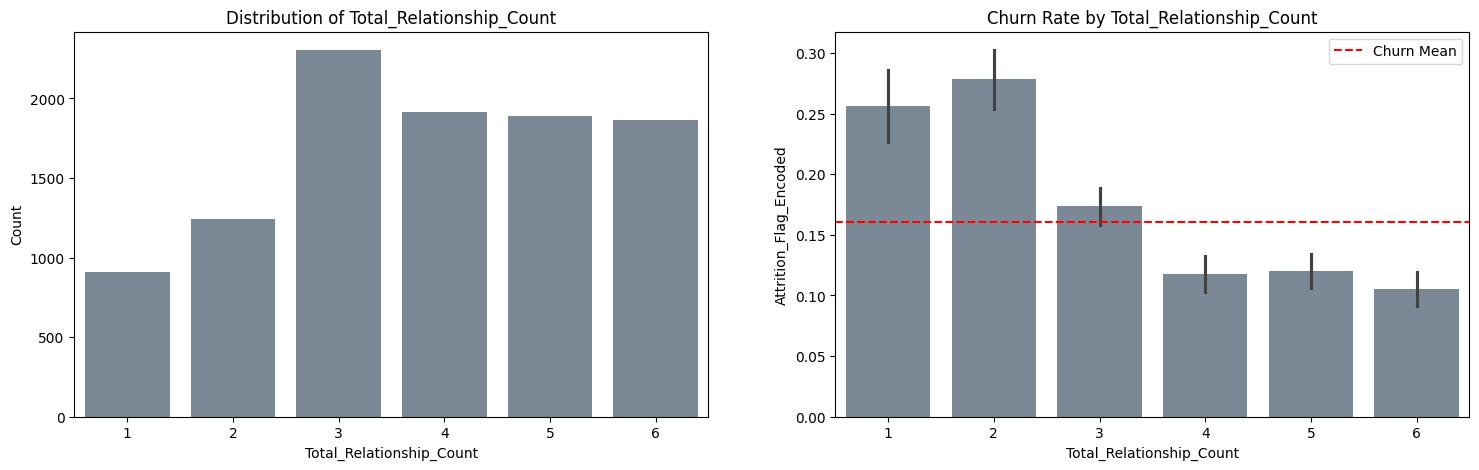

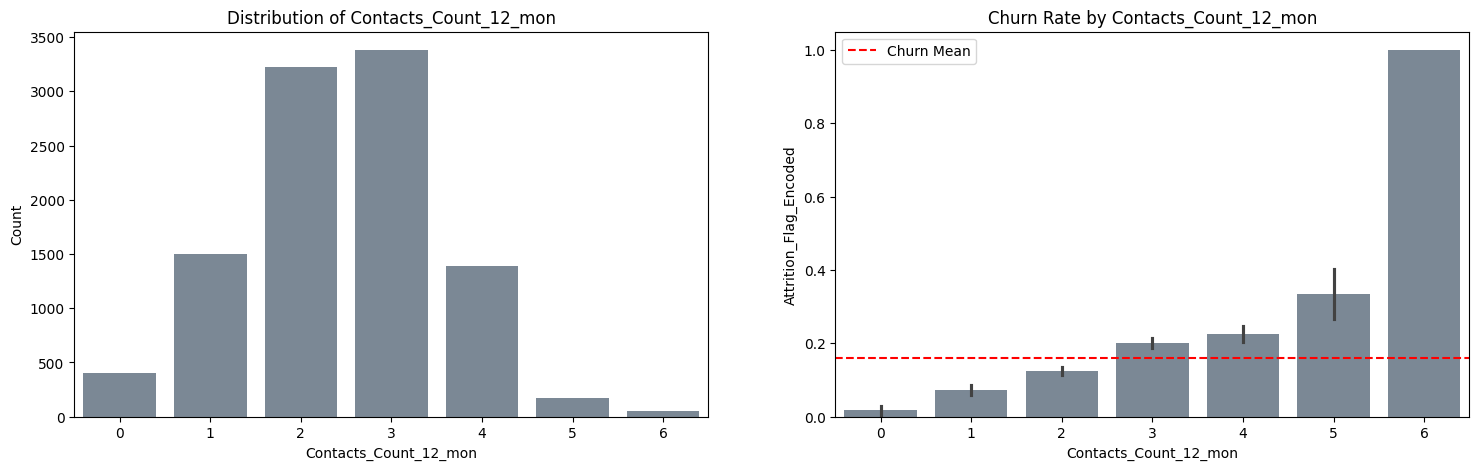

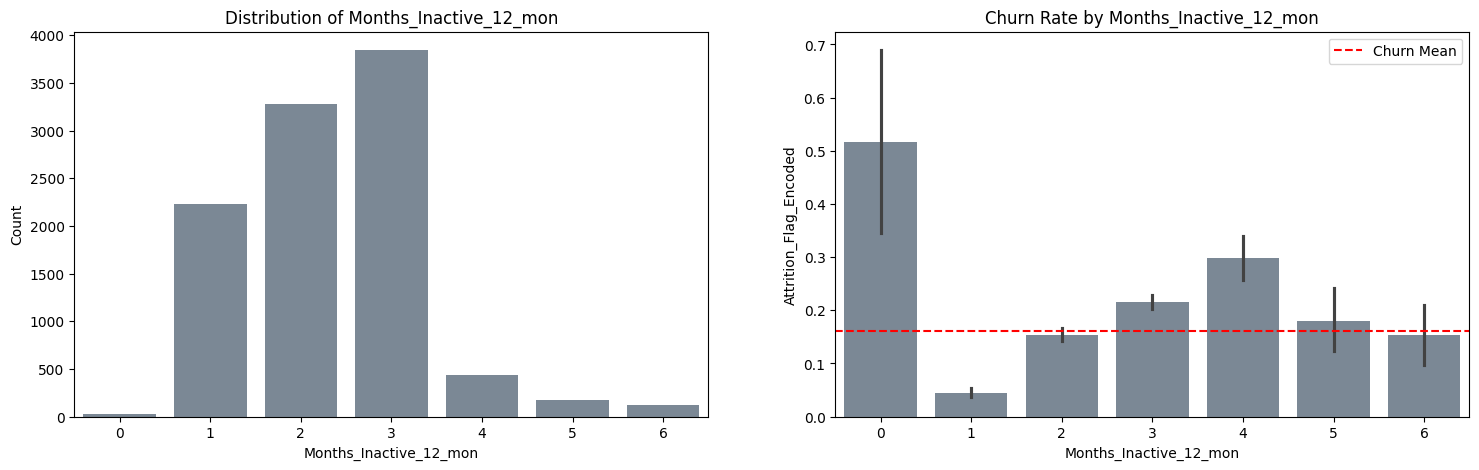

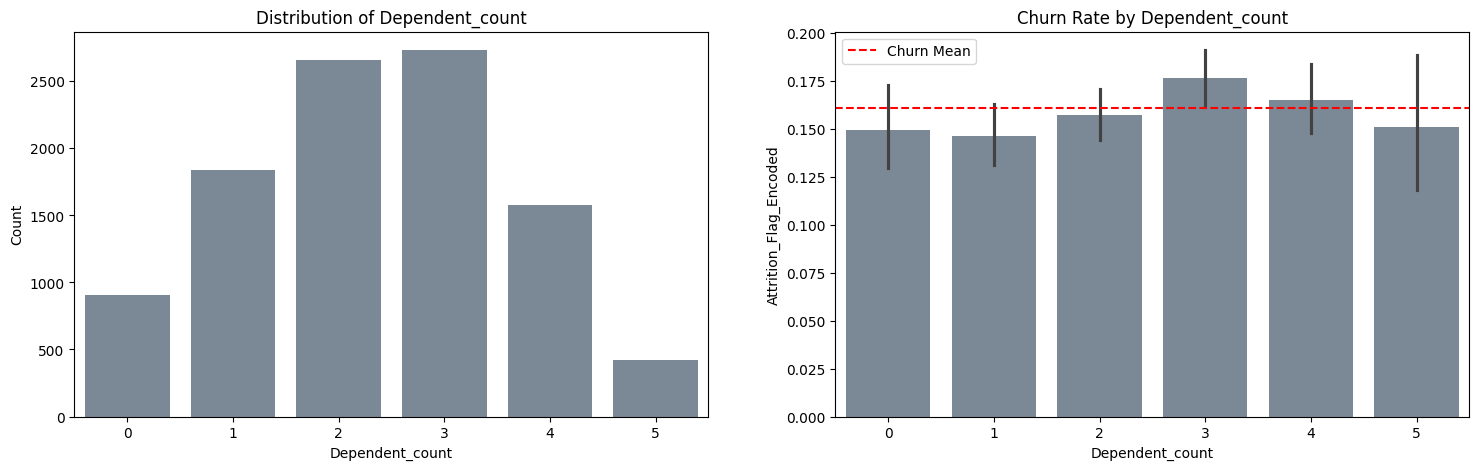

In [16]:
discrete_cols = ['Total_Relationship_Count', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Dependent_count']

for col in discrete_cols:
    fig, ax = plt.subplots(1, 2, figsize=(18, 5))

    # Plot 1 - Distribution
    sns.countplot(data=df_copy, x=col, color='lightslategray', ax=ax[0])
    ax[0].set_title(f'Distribution of {col}')
    ax[0].set_ylabel('Count')

    # Plot 2 - Churn Rate
    sns.barplot(data=df_copy, x=col, y='Attrition_Flag_Encoded', color='lightslategray', ax=ax[1])
    ax[1].axhline(avg_churn, color='r', linestyle='--', label=f'Churn Mean')
    ax[1].legend()
    ax[1].set_title(f'Churn Rate by {col}')

    plt.show()

##### Investigating Zero Months of Inactivity
In the previous section, an apparent anomaly was observed in which clients with zero months of inactivity exhibited a churn rate exceeding 50%. Although this behavior could initially be attributed to statistical noise due to the small sample size, a more granular comparison between retained and churned clients within this group suggests the presence of a consistent behavioral pattern rather than random variation.

Specifically, churned clients classified as “active” tend to be long-tenured customers who show near-zero credit utilization alongside a higher frequency of customer service contacts. This combination indicates **disengagement** despite technical account activity, suggesting that `Months_Inactive_12_mon = 0` may capture customers in a late-stage churn process rather than genuinely active users.

In [17]:
df_copy[df_copy['Months_Inactive_12_mon'] == 0].groupby('Attrition_Flag_Encoded')[['Months_on_book', 
                                                                                   'Contacts_Count_12_mon', 
                                                                                   'Total_Trans_Ct', 
                                                                                   'Total_Trans_Amt', 
                                                                                   'Avg_Utilization_Ratio']].mean()


Months_on_book  Contacts_Count_12_mon  Total_Trans_Ct  \
Attrition_Flag_Encoded                                                          
0                            33.714286               1.642857       66.571429   
1                            47.600000               3.400000       43.066667   

                        Total_Trans_Amt  Avg_Utilization_Ratio  
Attrition_Flag_Encoded                                          
0                                3858.5               0.271500  
1                                2501.0               0.045267

##### Correlation Heatmap of Discrete Numerical Features

To conclude the analysis of discrete numerical features, we assess potential redundancy among them by examining pairwise correlations. The resulting heatmap confirms the findings from previous analyses and provides strong support for the modeling stage. The near-zero correlations between the discrete variables indicate that they capture independent behavioral signals, allowing the model to combine complementary risk factors rather than learning redundant patterns.

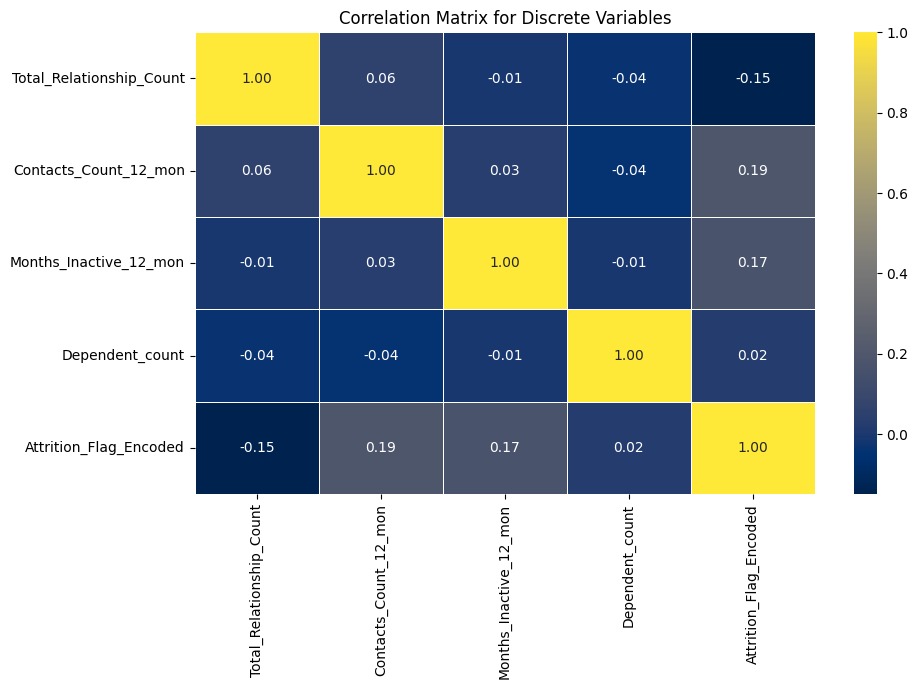

In [18]:
cols_corr = discrete_cols + ['Attrition_Flag_Encoded']

plt.figure(figsize=(10, 6))
sns.heatmap(df_copy[cols_corr].corr(method='spearman'), annot=True, cmap='cividis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Discrete Variables')
plt.show()

#### Continuous Numerical Features

These features capture continuous measures of customer behavior and financial activity. The analysis examines their distributions and explores how churn risk varies across the numerical range, with emphasis on non-linear effects, concentration patterns and potential early-warning signals.

##### Distribution and Churn Risk by Continuous Features

`Customer_Age`
- The age distribution is approximately normal and well-behaved. However, churn rates display minimal fluctuations across age bands, indicating limited predictive power.


`Months_on_book`
- The variable exhibits a noticeable spike around 36 months, possibly related to cohort effects or data collection artifacts, which will be investigated further. Outside this region, no clear monotonic or non-linear relationship with churn is observed, also indicating limited individual predictive relevance.


`Credit_Limit`
- The distribution is heavily right-skewed, with an apparent operational cap around 34k USD, suggesting product-level or policy-imposed credit limits. Churn rates are significantly higher among customers with lower credit limits.


`Avg_Open_To_Buy`
- This feature is largely redundant with `Credit_Limit`. Since most customers carry relatively low revolving balances, available credit closely mirrors total credit limit. This strongly suggests potential multicollinearity and warrants further analysis.


`Total_Revolving_Bal`
- One of the strongest retention predictors, reflecting a financial lock-in effect. Customers with zero revolving balance show extremely high churn (>35%), while carrying revolving debt significantly increases retention. Conversely, approaching the credit ceiling (2.5k USD) leads to a secondary churn spike, suggesting risk-driven exits or frustration with product limits.


`Total_Trans_Ct`
- The distribution is bimodal, with peaks around 40 and 80 transactions. Churn risk increases among moderately active clients (up to 54 transactions) but drops sharply beyond this threshold, suggesting that sustained high transaction activity represents an ideal engagement level for churn prevention.


`Total_Trans_Amt`
- The distribution is multimodal, reflecting distinct spending segments. Low spenders (<3k USD) show elevated churn. Churn is minimized in the mid-spend range, then increases among high spenders (7k–13k USD) and drops to zero for ultra-high spenders (>13k USD), though this last effect should be interpreted cautiously due to smaller sample size.


`Total_Ct_Chng_Q4_Q1`
- Acts as a strong early-warning indicator. A ratio below 0.6 — indicating a drop of more than 40% in transaction frequency toward year-end — corresponds to extremely high churn risk, signaling clear behavioral disengagement.


`Total_Amt_Chng_Q4_Q1`
- Follows the same logic as transaction count change but with a weaker signal, as reduced spending may reflect lower ticket sizes rather than reduced engagement.


`Avg_Utilization_Ratio`
- Exhibits a great amount of zero utilization clients. Risk is elevated at both extremes: near-zero utilization (inactivity or disengagement) and very high utilization (>76%), which may reflect the pursuit of higher limits from competitors.

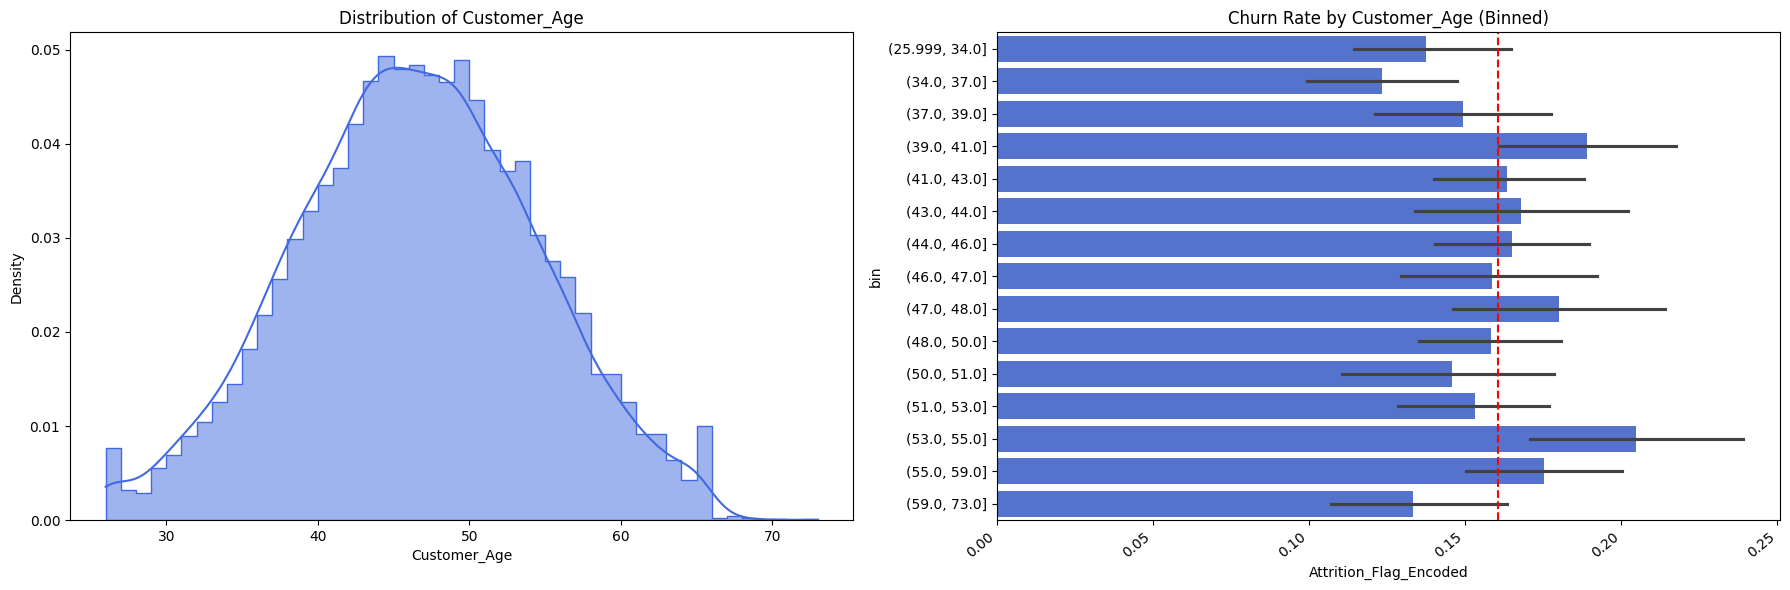

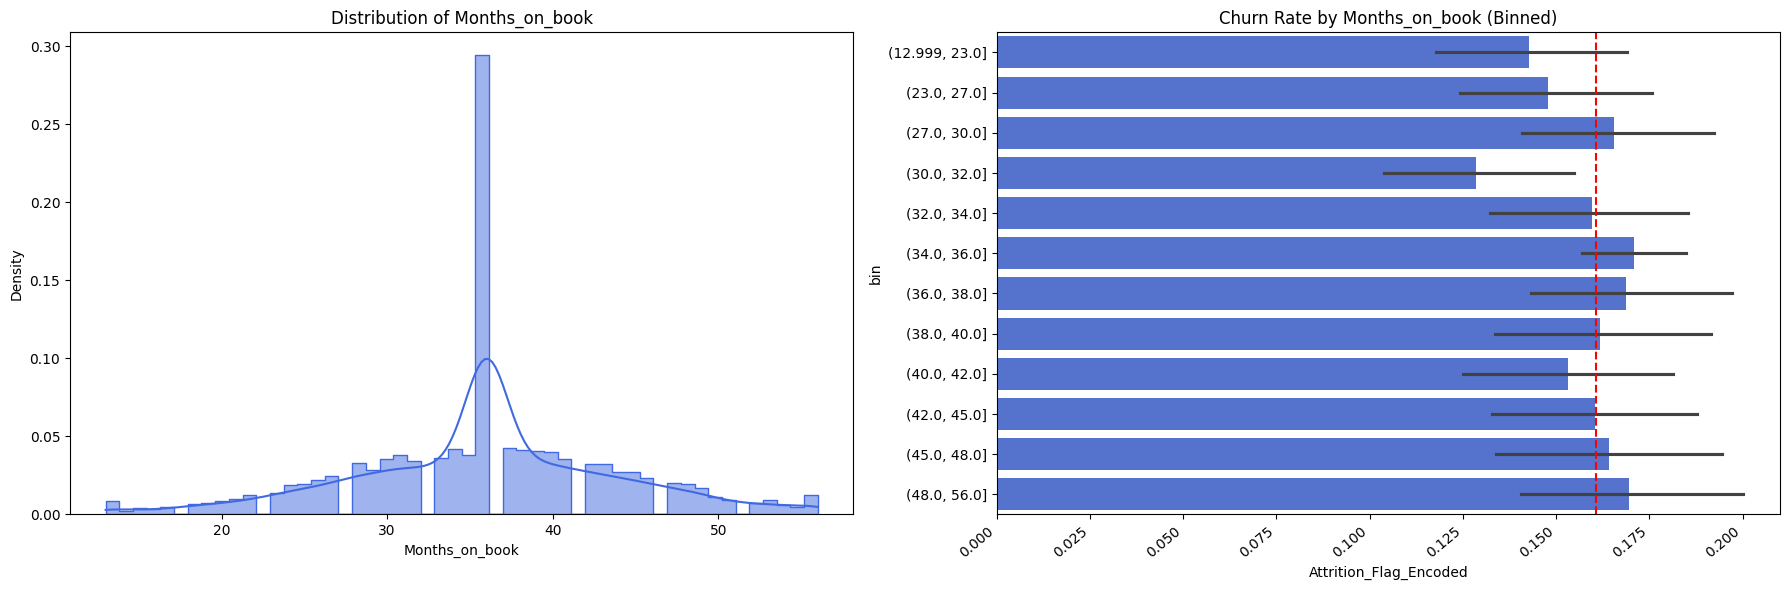

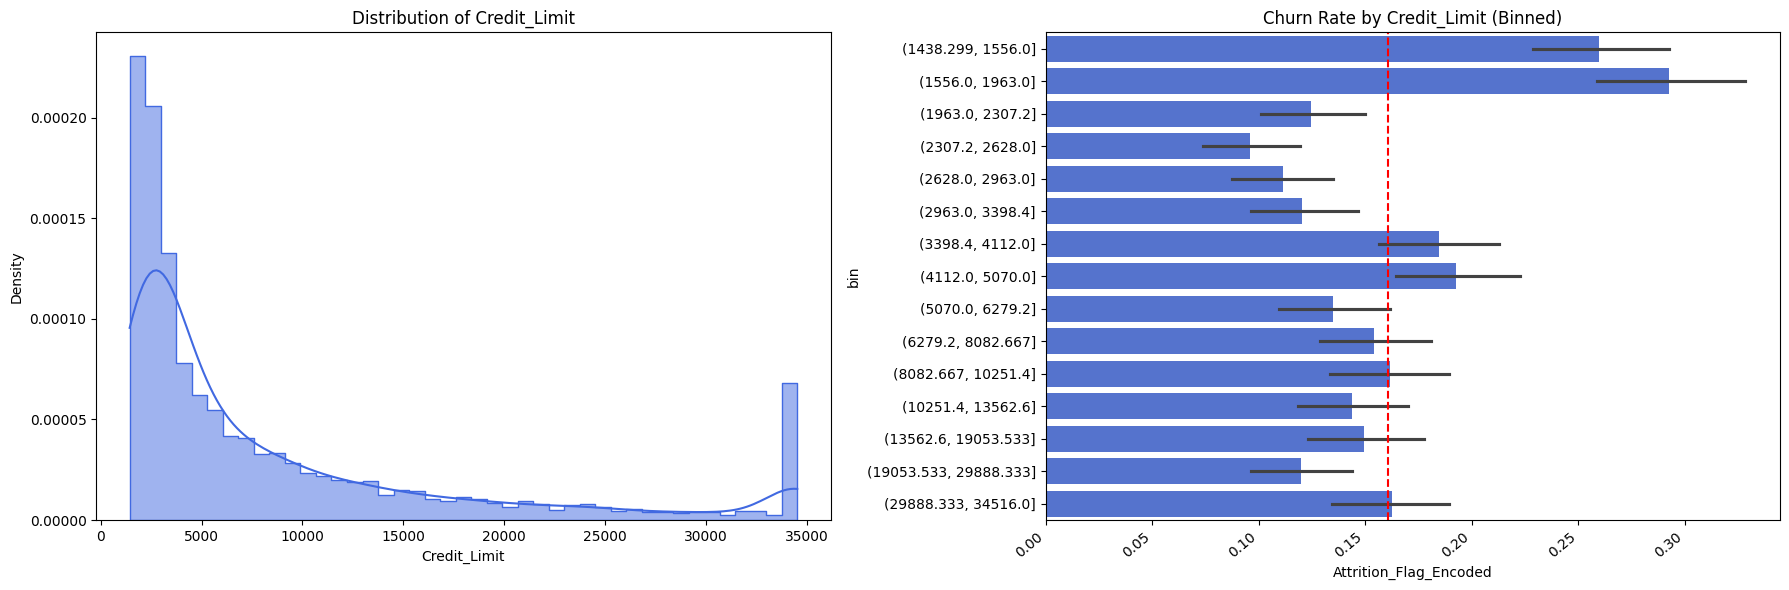

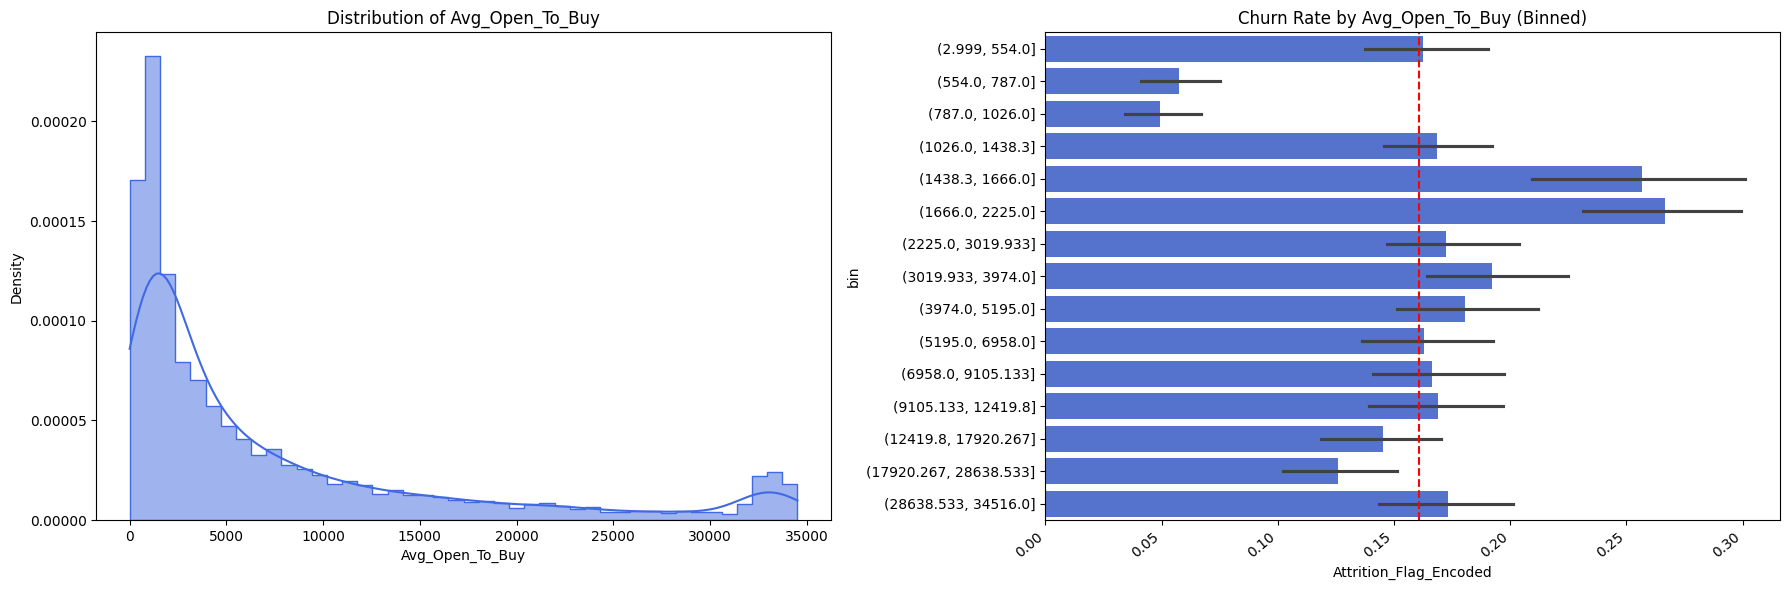

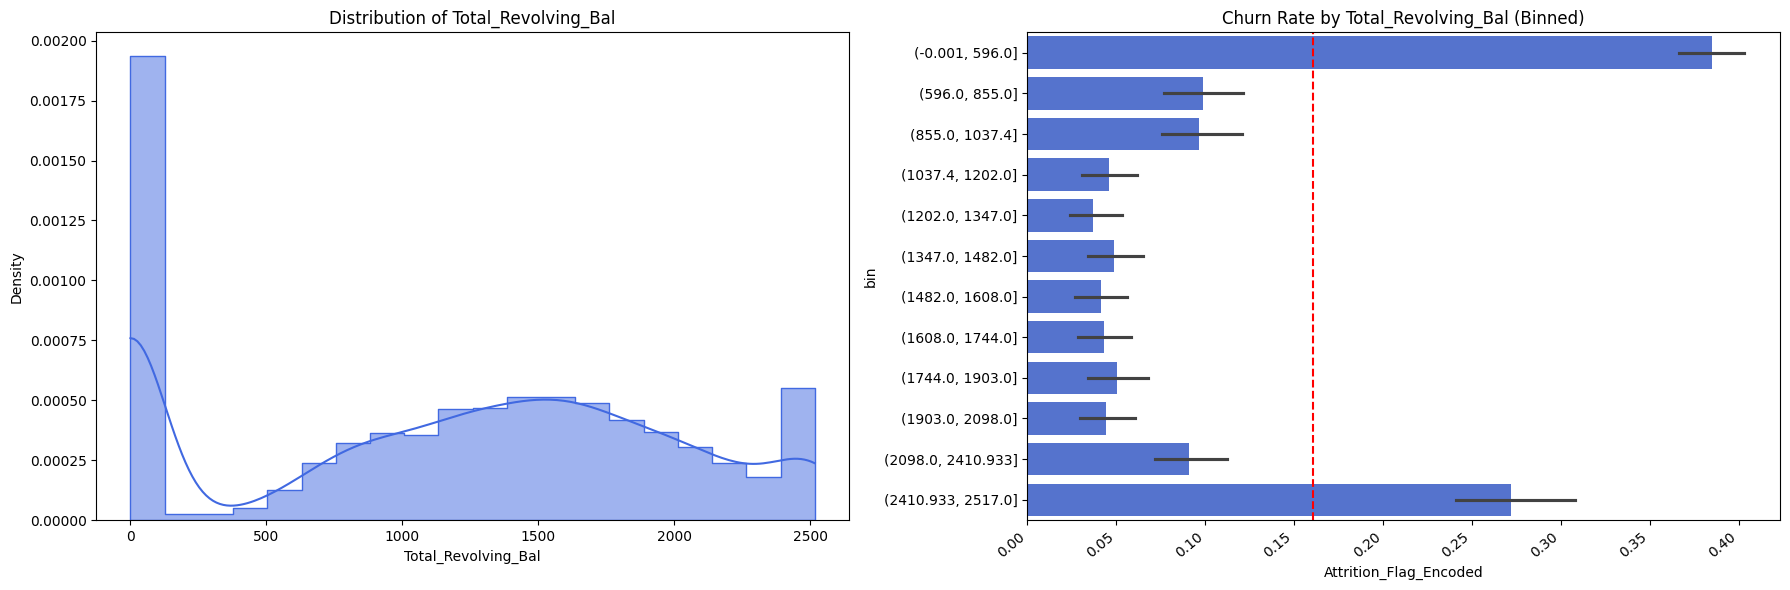

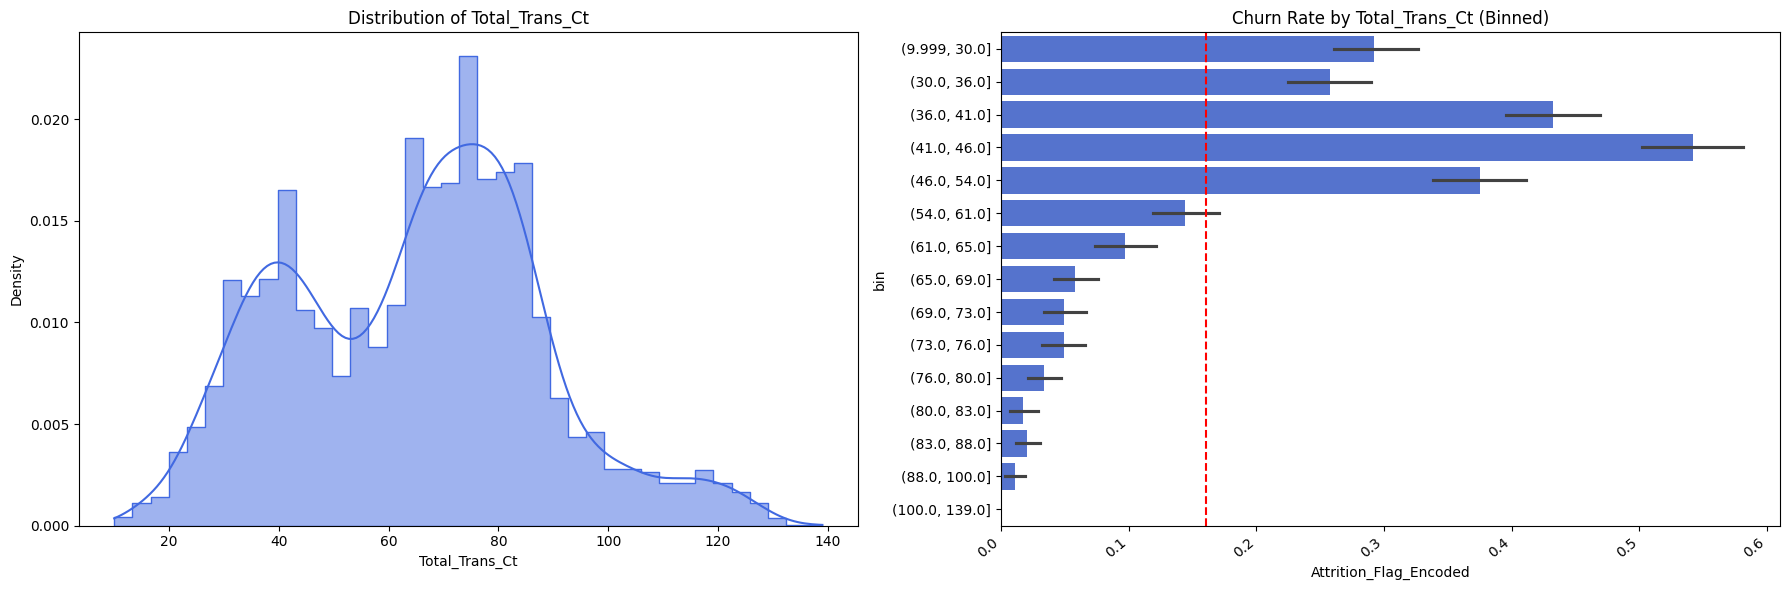

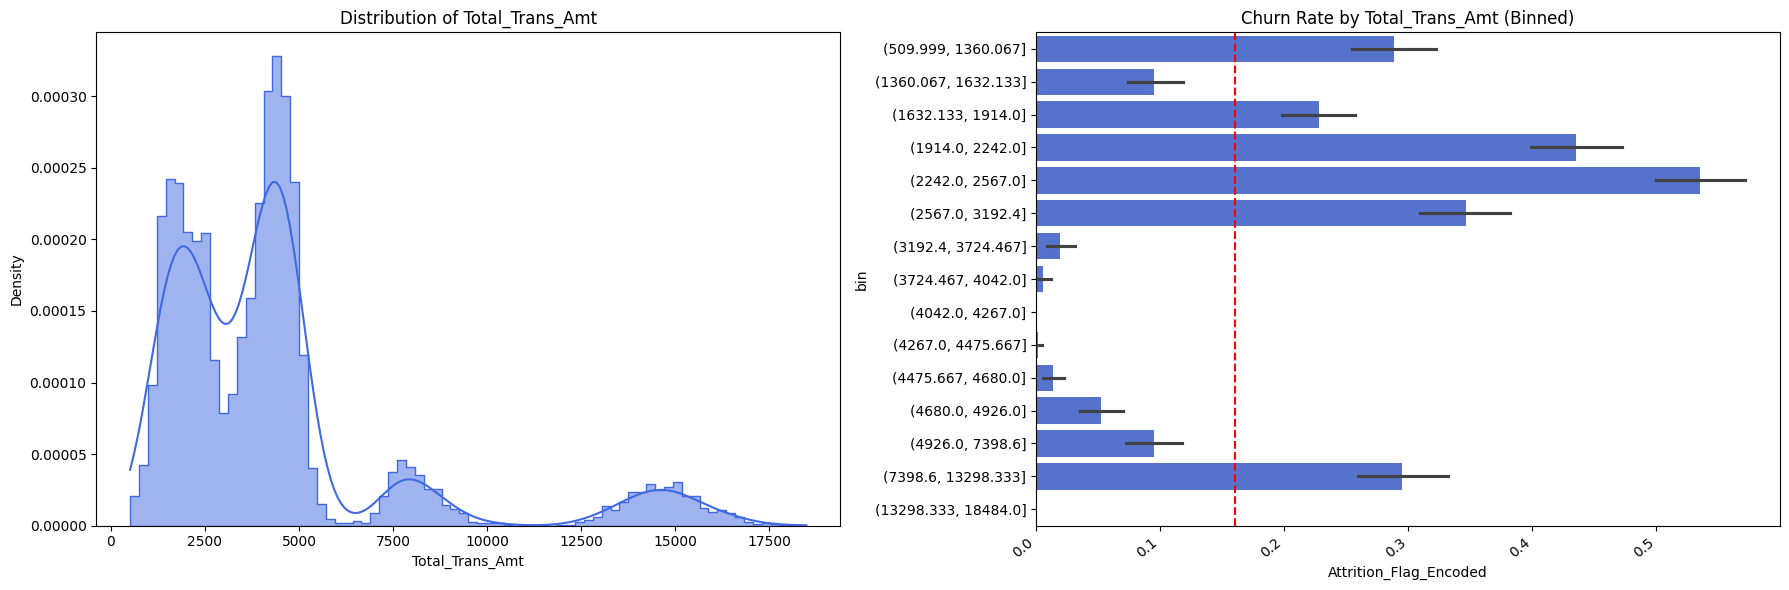

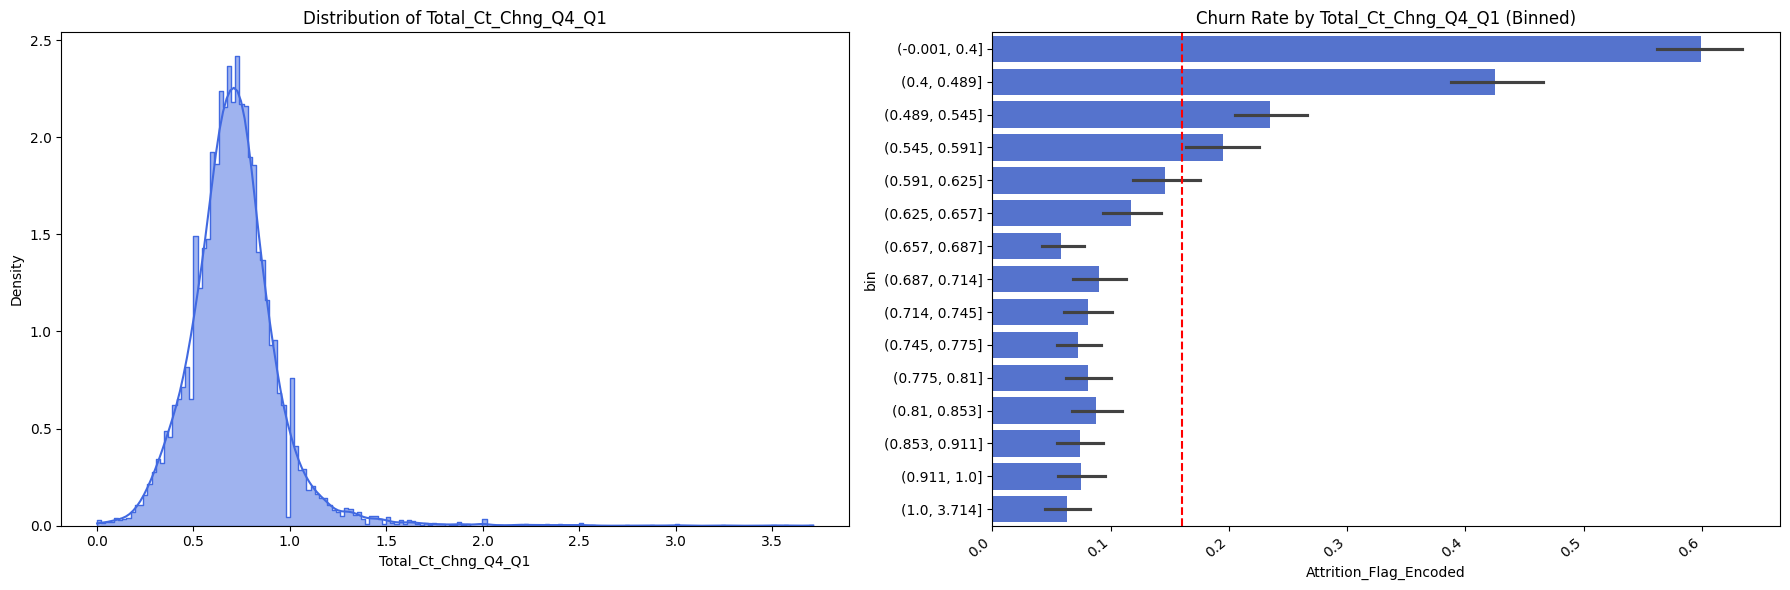

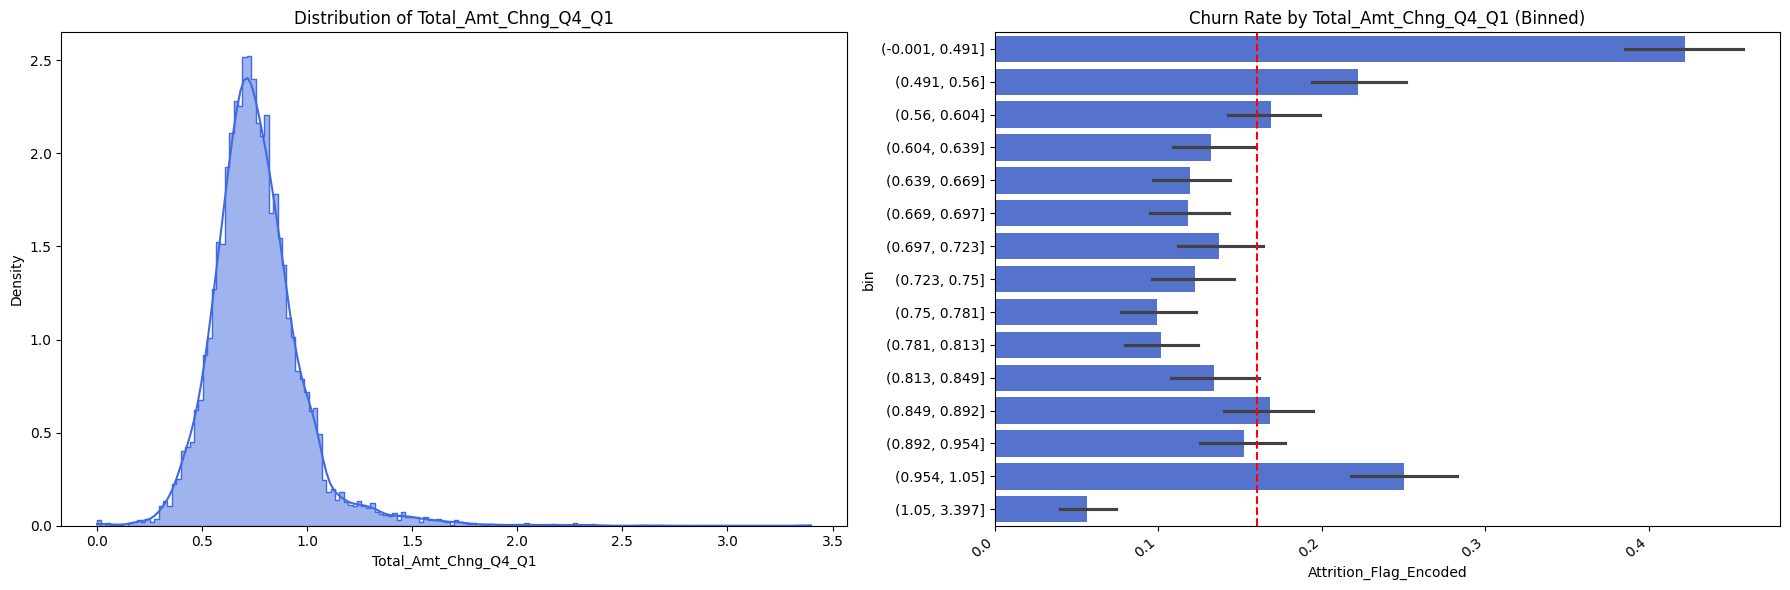

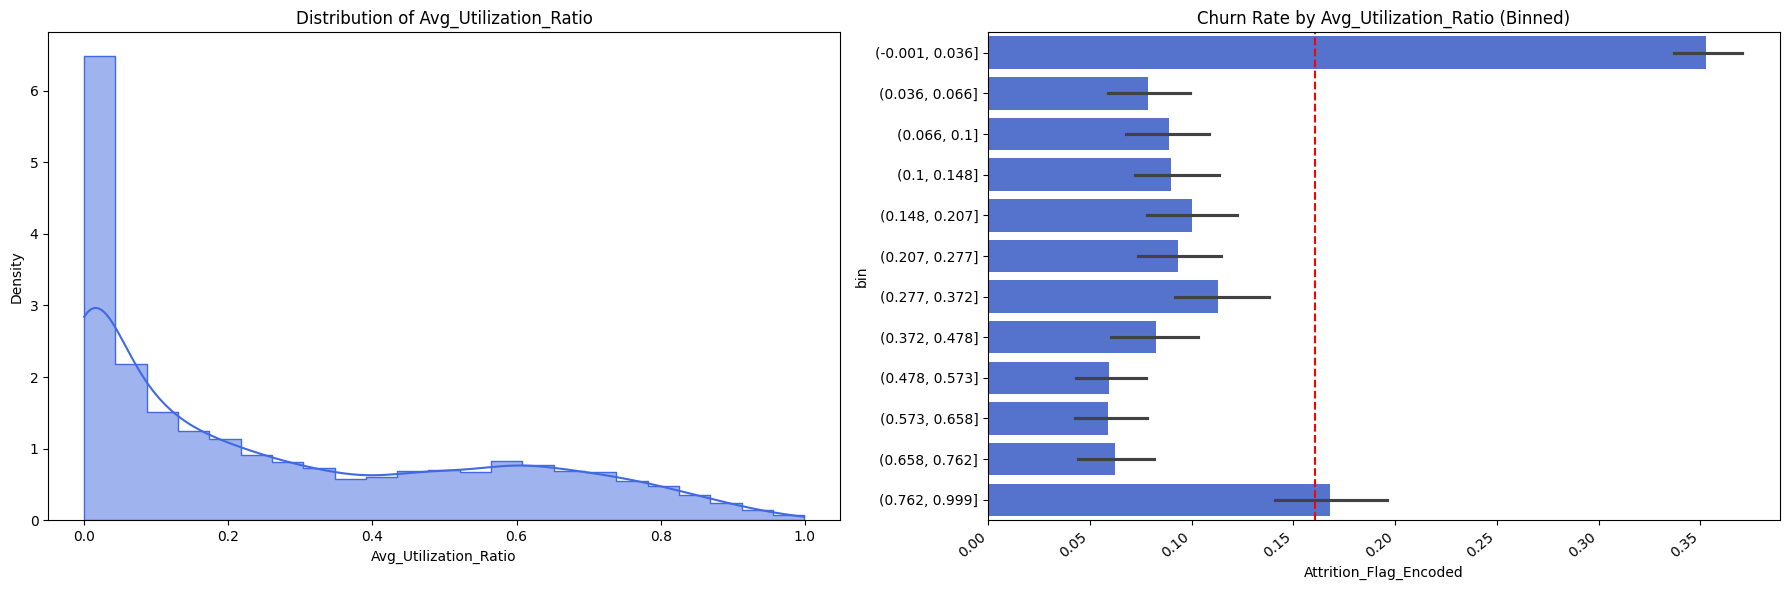

In [19]:
continuous_cols = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal',
                    'Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1',
                    'Avg_Utilization_Ratio']

for col in continuous_cols:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot 1 - Distribution
    sns.histplot(data=df, x=col, kde=True, stat="density", element="step", color='royalblue', ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')

    # Plot 2 - Churn Rate
    bins = pd.qcut(df_copy[col], q=15, duplicates='drop')

    sns.barplot(data=df_copy.assign(bin=bins), y='bin', x='Attrition_Flag_Encoded', color='royalblue', ax=axes[1])
    axes[1].axvline(x=avg_churn, linestyle='--', color='r')
    axes[1].set_title(f'Churn Rate by {col} (Binned)')
    axes[1].tick_params(axis='x', rotation=40)
    for label in axes[1].get_xticklabels():
        label.set_ha('right')
        
    plt.tight_layout()
    plt.show()

##### Investigating Months on Book Anomaly

In the previous section, an unusual concentration was observed in the `Months_on_book` feature, with a disproportionately large number of customers showing exactly 36 months of tenure. As previously noted, this pattern is consistent with a potential imputation strategy (like median or rounded mean). To further investigate this hypothesis, the following visualization examines the relationship between customer age and months on book.

Under normal circumstances, a broadly positive relationship is expected, as older customers tend to have longer relationships with the bank. However, the scatter plot reveals a pronounced horizontal band at exactly 36 months spanning all age groups, clearly violating this natural relationship. Since it is highly implausible for customers across nearly all ages to have joined the bank simultaneously, this pattern strongly suggests artificial value insertion due to missing data imputation, thereby reducing the reliability of this feature for the affected records.

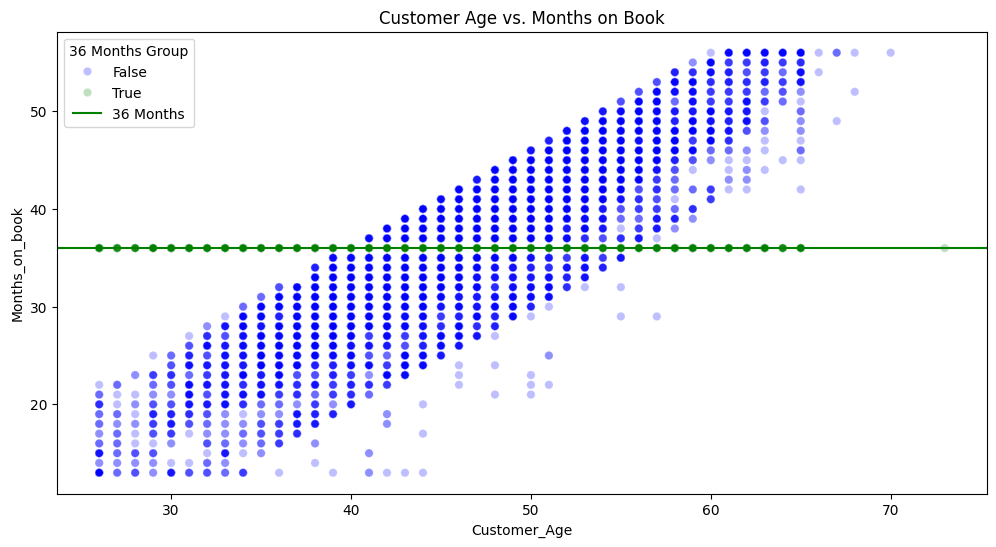

In [20]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df_copy, x='Customer_Age', y='Months_on_book', hue=(df['Months_on_book'] == 36), 
                palette={True: 'green', False: 'blue'}, alpha=0.25)

plt.title('Customer Age vs. Months on Book')
plt.axhline(36, color='green', linestyle='-', label='36 Months')
plt.legend(title='36 Months Group')

plt.show()

##### Strategy for Handling Months on Book Anomaly

The prior analysis suggests that the spike at 36 months results from a imputation. Given the intuitive link between age and tenure, we will investigate the linearity between `Customer_Age` and `Months_on_book`. If a strong correlation is confirmed, a linear regression–based imputation strategy will be applied to reconstruct the feature's natural variance.

##### Correlation Heatmap of Continuous Numerical Features

To conclude the analysis of continuous numerical features, the correlation matrix below reinforces the insights from the distributional analysis, confirming that behavioral metrics outweigh demographic factors in predicting churn. For instance, `Total_Trans_Ct` shows the strongest inverse correlation with the target ($\rho = -0.37$), highlighting low transaction frequency as a critical risk factor. Similarly, `Total_Ct_Chng_Q4_Q1` ($\rho = -0.29$) indicates that a deceleration in activity serves as a key early warning signal, while `Total_Revolving_Bal` ($\rho = -0.26$) suggests that customers with lower revolving debt are less financially engaged and thus more prone to churn.

The heatmap also reveals perfect multicollinearity ($\rho = 1.00$) between `Credit_Limit` and `Avg_Open_To_Buy`, necessitating the exclusion of one feature to maintain model stability. Additionally, the strong positive correlation ($\rho = 0.79$) between `Customer_Age` and `Months_on_book` provides statistical support for the proposed linear regression imputation strategy, confirming a robust linear dependency between age and tenure.

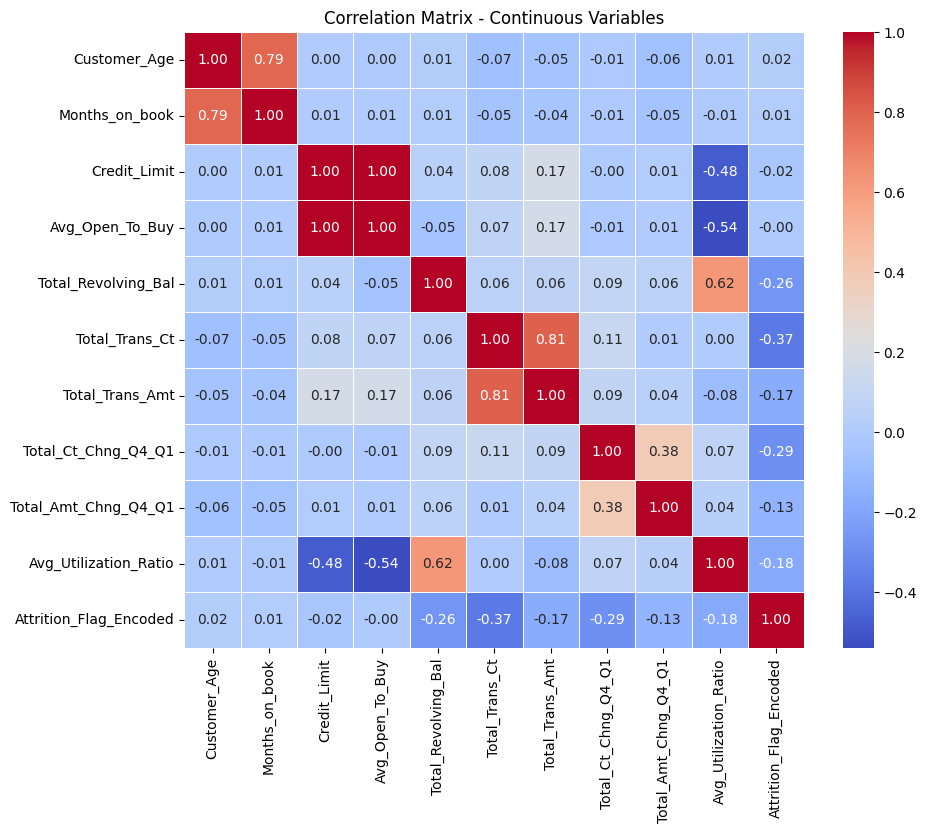

In [22]:
corr_cols = continuous_cols + ['Attrition_Flag_Encoded']


plt.figure(figsize=(10, 8))
sns.heatmap(df_copy[corr_cols].corr(), annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - Continuous Variables')
plt.show()

---
### Multivariate and Strategic Analysis

In the previous observations, most analyses were bivariate, focusing on understanding each variable and its nuances. In this section, the focus shifts to exploring how variables interact with one another, revealing patterns and relationships that can inform business-oriented decisions and may also help guide the following phases.

#### Behavioral Segmentation

##### Transfer Volume and Value by Attrition Status

This visualization aims to isolate the combined effect of transaction frequency and monetary value on churn risk. Three distinct behavioral clusters are immediately apparent:

1. **High-Value / High-Frequency:** Customers who consistently transact large amounts show virtually zero churn risk.

2. **Mid-Value Segment:** This region is volatile. While spending levels are comparable, churn is heavily concentrated among customers with lower transaction counts, whereas higher frequency acts as a protective factor.

3. **Low-Value Segment:** This cluster mirrors the pattern above. Low spenders with low engagement (fewer transfers) exhibit high churn rates. Conversely, low spenders who maintain a high transaction frequency are highly retained.

Therefore, these clusters reinforce the strong predictive power of `Total_Trans_Ct`, particularly beyond the 54-transaction threshold previously identified. Crucially, the analysis demonstrates that absolute monetary value is secondary to habit, as high engagement protects even low-spending clients. This observation suggests that the ratio between transaction amount and count ( `Average_Ticket_Size`) may serve as an additional behavioral feature for modeling.

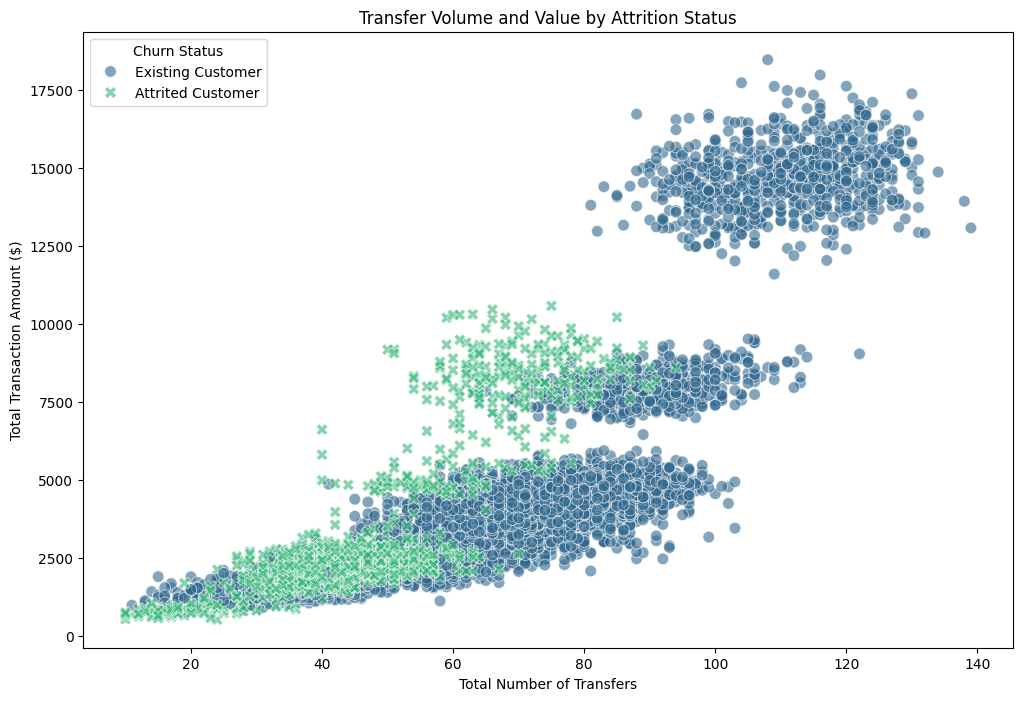

In [18]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_copy, x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Attrition_Flag', style='Attrition_Flag',
                alpha=0.6, palette='viridis', s=70)

plt.title('Transfer Volume and Value by Attrition Status')
plt.xlabel('Total Number of Transfers')
plt.ylabel('Total Transaction Amount ($)')
plt.legend(title='Churn Status')

plt.show()

#### Early Warning Signals

##### Transaction Volume vs. Transaction Count Change

This visualization investigates whether absolute transaction volume moderates the early-warning signal captured by recent usage change.

The joint analysis of usage trend (`Total_Ct_Chng_Q4_Q1`) and activity level (`Total_Trans_Ct`) reveals a critical disengagement zone: churn is highly concentrated among customers with stagnant or declining activity (ratio ≤ 1.0), particularly within the moderate activity range (30–60 transactions).

Two protective regimes are also evident. Customers with very high historical engagement (≈ 90+ transactions) exhibit negligible churn even when recent activity declines. Conversely, customers with lower transaction volumes but strong positive momentum (ratio ≥ 1.5) also display low churn rates.

These patterns suggest a compensatory relationship between engagement level and usage trend: either sustained high activity or strong recent growth is sufficient to mitigate churn risk. This reinforces the role of `Total_Ct_Chng_Q4_Q1` as an early-warning signal, whose impact is conditioned by the customer’s baseline engagement.

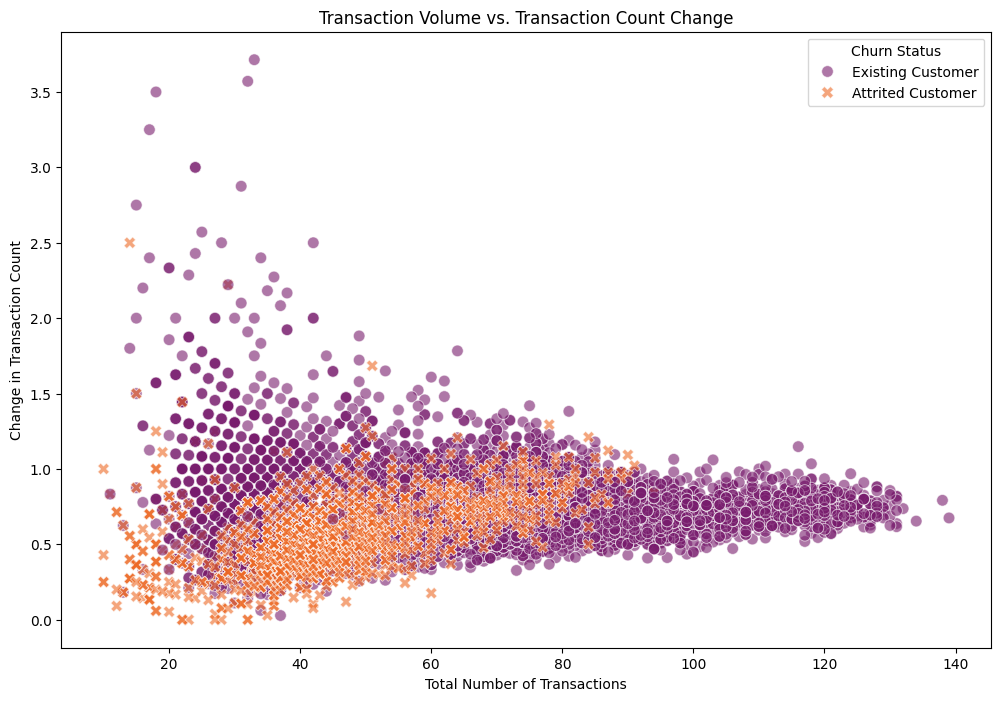

In [19]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_copy, x='Total_Trans_Ct', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', style='Attrition_Flag',
                alpha=0.6, palette='inferno', s=70)

plt.title('Transaction Volume vs. Transaction Count Change')
plt.xlabel('Total Number of Transactions')
plt.ylabel('Change in Transaction Count')
plt.legend(title='Churn Status')

plt.show()

#### Credit Utilization and Financial Risk

##### Revolving Balance vs. Credit Limit by Attrition Status

The interaction between `Total_Revolving_Bal` and `Credit_Limit` reveals a dual-risk profile driven by credit utilization dynamics.

1. **Low Lock-in Risk:** A dense concentration of churn is observed among customers with near-zero revolving balance across all credit limits. These clients exhibit no financial lock-in, making them highly susceptible to attrition due to disengagement rather than financial constraints.

2. **High Utilization Risk:** Churn re-emerges among customers with lower credit limits (< 15k) who carry high revolving balances. As these clients approach full credit utilization, purchasing power constraints likely generate frustration, increasing the probability of churn driven by product limitations.

3. **Healthy Utilization Zone:** In the intermediate region, where customers maintain a revolving balance while preserving available credit, churn is more evenly distributed. This suggests a balanced financial relationship, where lock-in exists without inducing credit stress and churn is more likely influenced by non-financial factors.

Hence, retention strategies should be bifurcated: incentivizing usage among zero-balance customers to increase engagement, while proactively offering credit limit adjustments to high-utilization clients to prevent product outgrowing and dissatisfaction.

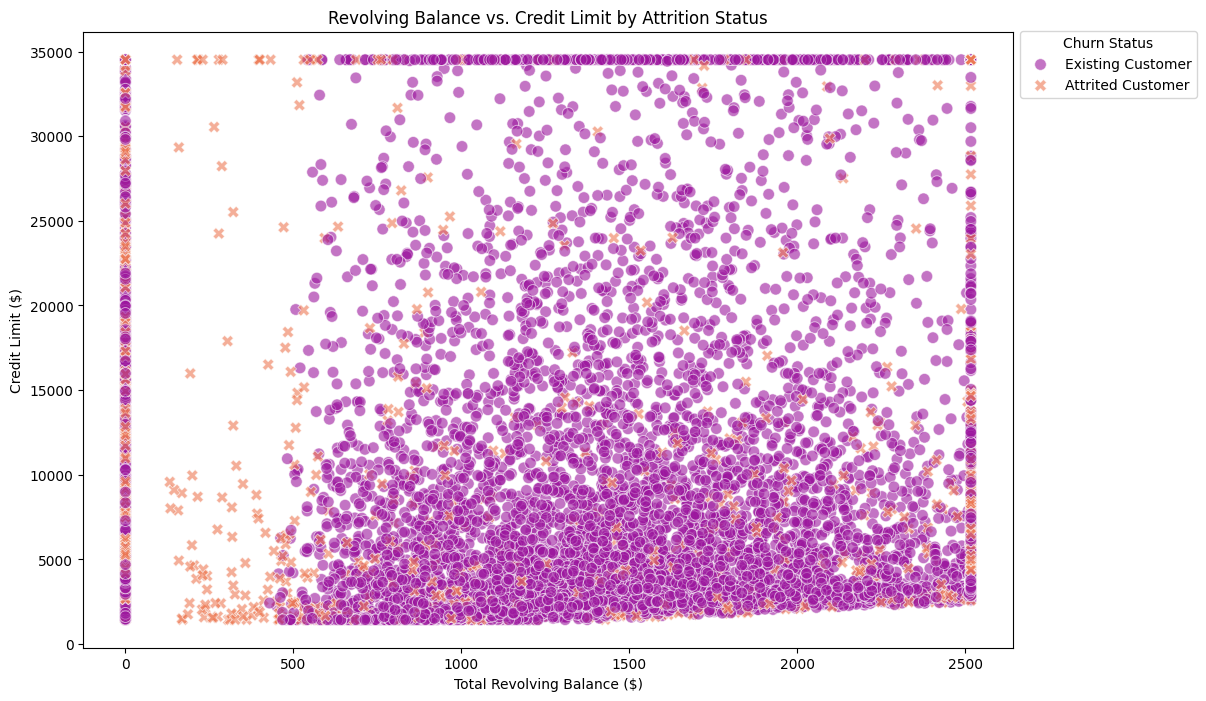

In [20]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_copy, x='Total_Revolving_Bal', y='Credit_Limit', hue='Attrition_Flag', style='Attrition_Flag',
                alpha=0.6, palette='plasma', s=70)

plt.title('Revolving Balance vs. Credit Limit by Attrition Status')
plt.xlabel('Total Revolving Balance ($)')
plt.ylabel('Credit Limit ($)')
plt.legend(title='Churn Status', bbox_to_anchor=(1, 1.0125))

plt.show()

#### Engagement–Friction Trade-off and Churn Thresholds

##### Transaction Volume vs. Customer Contacts (Last 12 Months)

This analysis reveals a clear behavioral threshold: high engagement compensates customer friction up to a well-defined limit. Customers with very high transaction activity (≥ 95 transactions) exhibit zero churn as long as support contacts remain below six. However, once this tolerance threshold is crossed, even the most active customers churn, indicating that excessive friction overrides habitual usage. This pattern reinforces the importance of engagement while highlighting service quality as a critical retention boundary.

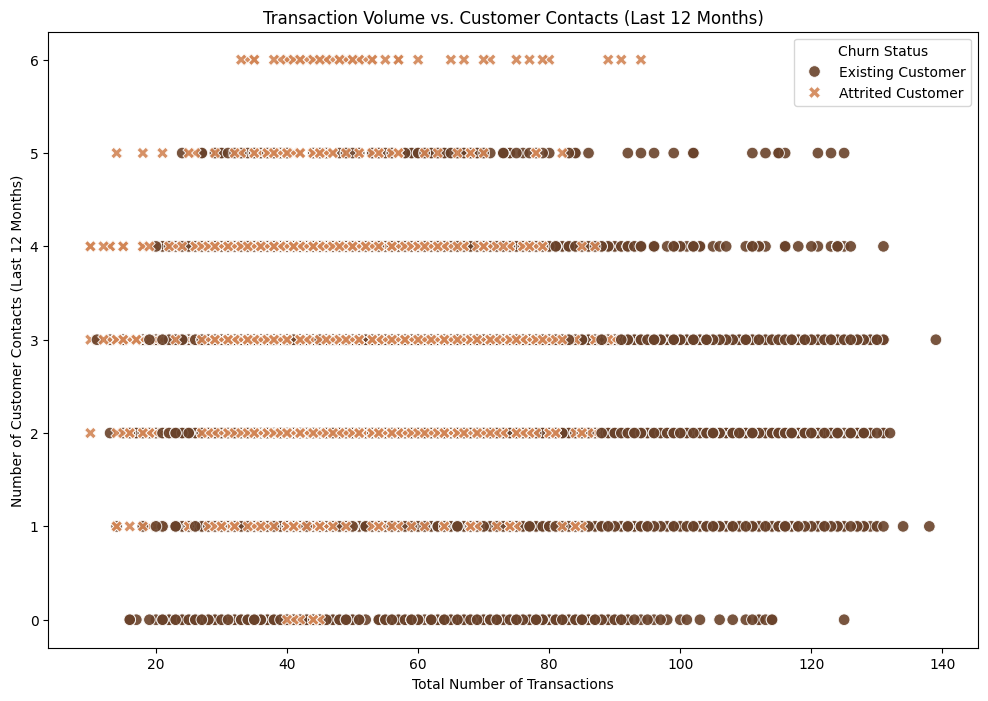

In [23]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_copy, x='Total_Trans_Ct', y='Contacts_Count_12_mon', hue='Attrition_Flag', style='Attrition_Flag',
                alpha=0.9, palette='copper', s=70)

plt.title('Transaction Volume vs. Customer Contacts (Last 12 Months)')
plt.xlabel('Total Number of Transactions')
plt.ylabel('Number of Customer Contacts (Last 12 Months)')
plt.legend(title='Churn Status')

plt.show()

#### Strategic Conclusions

This multivariate analysis consolidates four core behavioral pillars that jointly explain customer attrition and translate directly into actionable business strategies.

1. **Behavioral Segmentation (Habit):** Customer retention is driven primarily by behavioral habit rather than absolute spending, suggesting that encouraging everyday usage is more effective than incentivizing sporadic high-value purchases.

2. **Early Warning Signals (Alert):** A decline in activity emerges as a critical early indicator of churn: customers exhibiting a reduction in transaction frequency, particularly within the mid-activity segment, form a clear disengagement zone. This enables the design of proactive retention triggers before churn materializes.

3. **Financial Risk (Balance):** Churn risk follows a U-shaped pattern with respect to credit utilization, as customers with no revolving balance lack financial lock-in, while those near full utilization face frustration due to credit constraints. This supports differentiated strategies, such as usage incentives for low-balance customers and credit limit adjustments for highly utilized accounts.

4. **Engagement–Friction Trade-off (Service Quality):** While high engagement can compensate for moderate service issues, excessive friction overrides habitual usage and leads to attrition even among highly active customers. This underscores service quality as a non-negotiable retention factor.

Collectively, these findings demonstrate that churn is governed by non-linear behavioral dynamics rather than isolated demographic or financial variables. The insights derived herein inform both targeted business interventions and subsequent modeling decisions, ensuring that feature engineering and predictive approaches remain grounded in observed customer behavior.

## 3. Saving the Dataset

After completing the exploratory analysis and structural cleaning, a stabilized version of the dataset was persisted. This snapshot serves as the foundation for subsequent preprocessing and modeling steps, ensuring reproducibility and clear separation between exploratory decisions and model-dependent transformations.

In [24]:
df.to_csv("../data/BankChurners_clean.csv", index=False)

---
<center>
  <div style="font-size: 0.85em; color: #555;">
    This notebook was developed as part of a personal data science portfolio project focused on customer churn prediction.</br>
    Author: Pedro Siqueira.</br>
    <a href="https://www.linkedin.com/in/phenriquels/" target="_blank">LinkedIn</a> ·
    <a href="https://github.com/phenriquels01" target="_blank">GitHub</a>
  </div>
</center>
